In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point
from uatk_spc.builder import Builder
from uatk_spc.reader import Reader

In [2]:
boundaries = gpd.read_file('../data/external/boundaries/oa_england.geojson')
#boundaries.to_file('../data/external/boundaries/oa_leeds.geojson',driver="GeoJSON")

In [3]:
Leeds_boundaries = boundaries[boundaries['MSOA21NM'].str.contains("Leeds", na=False)]


<Axes: >

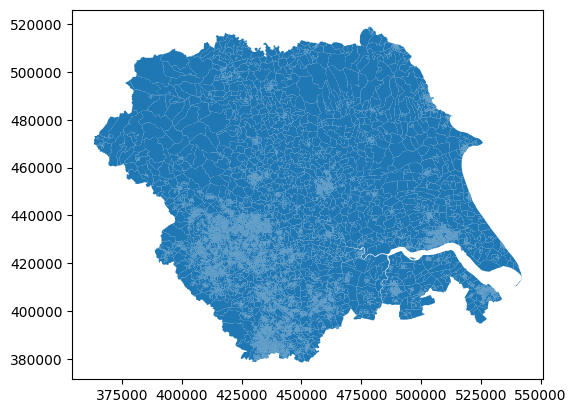

In [4]:
Yorkshire_and_Humber_boundaries=boundaries[boundaries["rgn22nm"]=="Yorkshire and The Humber"]
Leeds_boundaries = boundaries[boundaries['MSOA21NM'].str.contains("Leeds", na=False)]
Yorkshire_and_Humber_boundaries.plot()

In [5]:
Leeds_list=Leeds_boundaries.MSOA21CD.unique()

In [6]:
#boundaries = gpd.read_file('../data/external/boundaries/oa_leeds.geojson')
#boundaries.plot()

In [7]:


path = "../data/external/spc_output_no_sic_code_matching/raw/"
region = "west-yorkshire"
spc = Reader(path, region, backend="pandas", input_type="parquet")
spc_people_hh = (
    Builder(path, region, backend="pandas", input_type="parquet")
    .add_households()
    .unnest(["health", "employment", "details", "demographics"], rsuffix="_household")
    .build()
)

In [8]:
spc_people_hh.msoa11cd.isin(Leeds_list)

0          False
1          False
2          False
3          False
4          False
           ...  
2339926     True
2339927     True
2339928     True
2339929     True
2339930     True
Name: msoa11cd, Length: 2339931, dtype: bool

In [9]:
leeds_spc_people_hh=spc_people_hh[spc_people_hh.msoa11cd.isin(Leeds_list)]
leeds_spc_people_hh

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
1192981,1192981,479310,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.3011...","[954, 1037, 1234, 2981, 6290, 9535, 10385, 106...","[955, 1036, 1235, 2980, 6291, 9536, 10384, 106...",E02002330_0001_001,34051017,1,2911721,...,2.0,NaN,6.0,True,2.0,2,1,68,1,1.0
1192982,1192982,479310,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.0884...","[3435, 6069, 13203, 14704]","[3436, 6068, 13202, 14703]",E02002330_0001_002,21040818,1,2904618,...,2.0,NaN,6.0,True,2.0,2,2,65,1,6.0
1192983,1192983,479311,NaN,"{'sport': 0.09000000357627869, 'rugby': 0.1133...","[762, 5168, 6201, 8977]","[761, 5169, 6200, 8976]",E02002330_0002_001,11131017,1,2902311,...,1.0,NaN,5.0,True,1.0,2,1,86,1,2.0
1192984,1192984,479312,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.16884...","[1580, 5417, 5956, 12901]","[1581, 5416, 5957, 12900]",E02002330_0003_001,15020311,1,2911131,...,1.0,NaN,6.0,True,2.0,1,1,58,1,4.0
1192985,1192985,479312,41330.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[318, 3145, 10496, 12819, 13943]","[319, 3144, 10495, 12818, 13942]",E02002330_0003_002,20090607,1,2909582,...,1.0,NaN,6.0,True,2.0,1,2,56,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339926,2339926,963456,83347.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,3.0,NaN,6.0,True,1.0,1,1,39,1,3.0
2339927,2339927,963457,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[1611, 2074, 3331, 3973, 5305, 7241, 9500, 10413]","[1610, 2075, 3330, 3974, 5304, 7240, 9499, 10412]",E02006876_3659_001,12080913,2,2903691,...,2.0,NaN,5.0,False,1.0,0,2,51,1,7.0
2339928,2339928,963458,NaN,"{'sport': 0.18799999356269836, 'rugby': 0.1184...","[1768, 1833, 2004, 3538, 5690, 5693, 9177, 112...","[1767, 1832, 2005, 3537, 5691, 5692, 9176, 112...",E02006876_3660_001,15291209,1,2905917,...,4.0,NaN,2.0,True,5.0,0,1,82,1,NaN
2339929,2339929,963459,NaN,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[2173, 14404, 15340, 16376]","[2174, 14403, 15339, 16377]",E02006876_3661_001,20280416,1,2907191,...,4.0,NaN,3.0,True,5.0,0,1,38,1,2.0


In [10]:
leeds_spc_people_hh[(leeds_spc_people_hh.workplace>0)]

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
1192985,1192985,479312,41330.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[318, 3145, 10496, 12819, 13943]","[319, 3144, 10495, 12818, 13942]",E02002330_0003_002,20090607,1,2909582,...,1.0,NaN,6.0,True,2.0,1,2,56,1,1.0
1192990,1192990,479314,41240.0,"{'sport': 0.27900001406669617, 'rugby': 0.2064...","[2746, 3667, 6718, 9441, 10161, 11869, 13638, ...","[2747, 3668, 6719, 9442, 10162, 11868, 13639, ...",E02002330_0005_002,52051016,2,2901384,...,1.0,NaN,5.0,True,2.0,1,2,51,1,2.0
1192992,1192992,479315,41103.0,"{'sport': 0.2680000066757202, 'rugby': 0.16884...","[877, 1139, 2067, 2282, 4320, 4556, 6217, 6940...","[878, 1138, 2066, 2283, 4319, 4557, 6216, 6939...",E02002330_0006_001,11151212,1,2906244,...,1.0,NaN,6.0,True,1.0,1,1,56,1,6.0
1192993,1192993,479315,40385.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[818, 825, 2201, 2707, 3259, 4190, 4866, 5517,...","[817, 826, 2200, 2706, 3258, 4189, 4867, 5516,...",E02002330_0006_002,16081219,2,2905273,...,1.0,NaN,6.0,True,1.0,1,2,55,1,3.0
1192994,1192994,479316,48738.0,"{'sport': 0.2549999952316284, 'rugby': 0.16064...","[1796, 2877, 4451, 5231, 5497, 6073, 6593, 669...","[1795, 2876, 4452, 5230, 5496, 6072, 6592, 669...",E02002330_0007_001,13291204,2,2907891,...,2.0,NaN,6.0,True,4.0,1,1,44,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339919,2339919,963451,83335.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3653_001,18050107,1,2904140,...,2.0,NaN,4.0,True,5.0,1,1,38,1,3.0
2339920,2339920,963451,78598.0,"{'sport': 0.2329999953508377, 'rugby': 0.17241...","[337, 485, 987, 3007, 3020, 3185, 3385, 5493, ...","[338, 486, 986, 3006, 3021, 3184, 3384, 5492, ...",E02006876_3653_002,53051001,2,2901241,...,2.0,NaN,4.0,True,5.0,1,2,25,1,2.0
2339921,2339921,963452,83386.0,"{'sport': 0.25699999928474426, 'rugby': 0.1901...","[5633, 15844]","[5632, 15845]",E02006876_3654_001,14260118,1,2908377,...,3.0,NaN,5.0,True,1.0,1,2,22,2,1.0
2339926,2339926,963456,83347.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,3.0,NaN,6.0,True,1.0,1,1,39,1,3.0


In [11]:
working_age_population=spc_people_hh[(spc_people_hh['age_years']>=16) & (spc_people_hh['age_years']<=65)]
no_workplace=working_age_population[~(working_age_population.workplace>0)]

In [12]:
sic1d2007=working_age_population.value_counts("sic1d2007",normalize=False)

In [13]:
sic1d2007.name="SPC"

In [15]:
west_yorksire_employment=pd.read_csv("../data/west-yorkshire-emplyment.csv",header=None)

FileNotFoundError: [Errno 2] No such file or directory: '../data/west-yorkshire-emplyment.csv'

In [34]:
west_yorksire_employment

0
A        50
B       490
C    110395
D      5480
E      6760
F     43670
G    155485
H     47820
I     58520
J     26995
K     47025
L     14605
M     78355
N    111795
O     41760
P    103395
Q    133070
R     25230
S     15085
T         0
U         0
Name: Business Register and Employment Survey, dtype: int64

In [17]:
west_yorksire_employment.index=west_yorksire_employment[0]

In [18]:
west_yorksire_employment=west_yorksire_employment.rename(columns={1:"Business Register and Employment Survey"})["Business Register and Employment Survey"]

In [33]:
west_yorksire_employment.sum()

1025985

In [19]:
df = pd.DataFrame([west_yorksire_employment,sic1d2007]).drop(columns="U")

In [20]:
df1 = df.T


<Axes: >

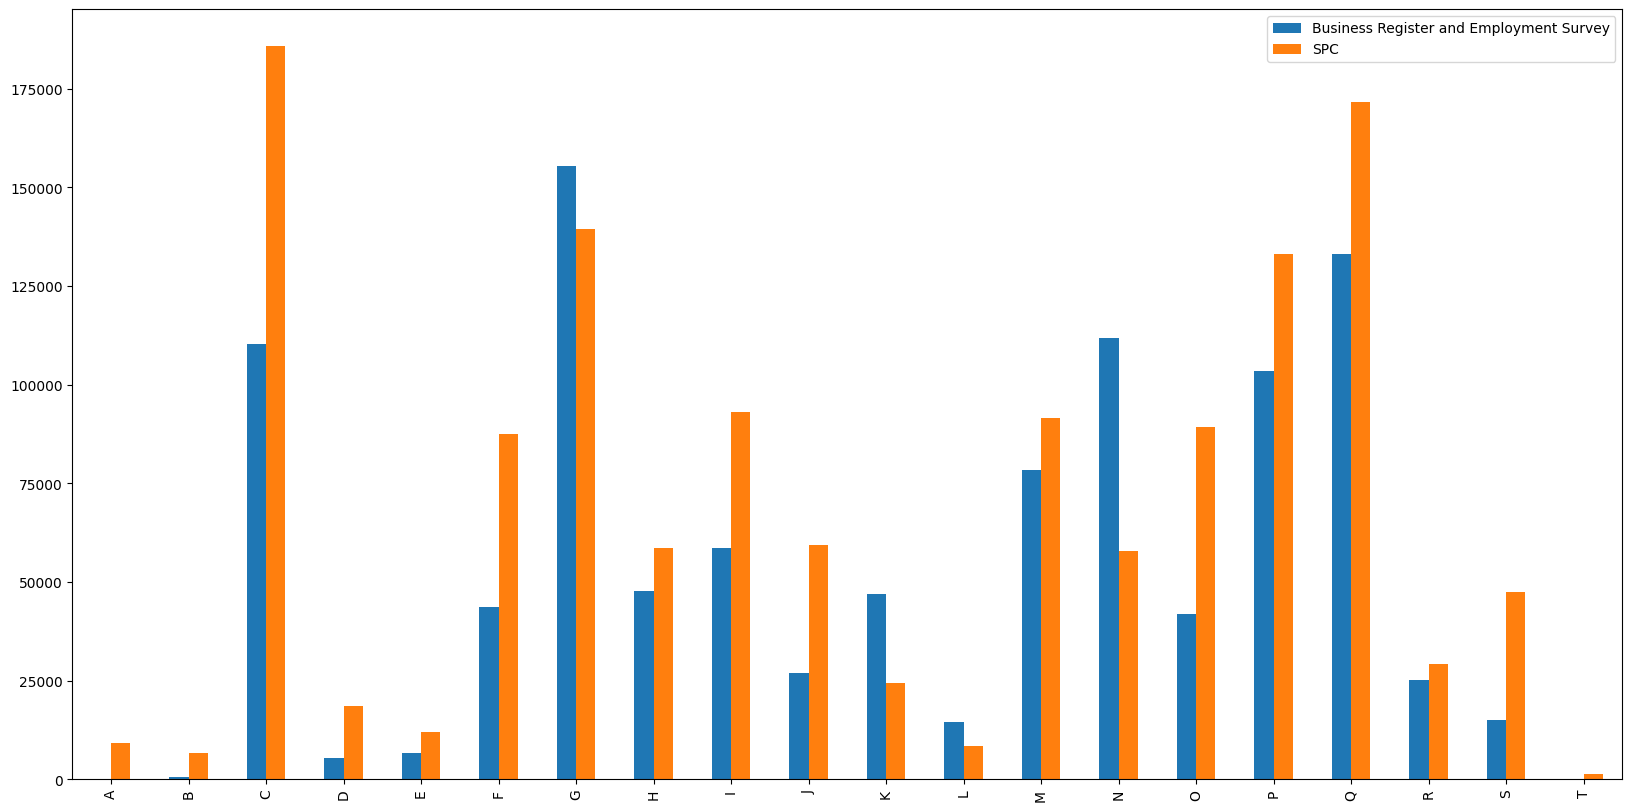

In [30]:
df1.plot.bar(figsize=(20,10))

In [24]:
sic1d2007

sic1d2007
C    185838
Q    171574
G    139518
P    133157
I     93064
M     91449
O     89160
F     87460
J     59388
H     58681
N     57881
S     47560
R     29147
K     24418
D     18483
E     11974
A      9258
L      8538
B      6757
T      1375
Name: SPC, dtype: int64

In [32]:
sic1d2007


sic1d2007
C    185838
Q    171574
G    139518
P    133157
I     93064
M     91449
O     89160
F     87460
J     59388
H     58681
N     57881
S     47560
R     29147
K     24418
D     18483
E     11974
A      9258
L      8538
B      6757
T      1375
Name: SPC, dtype: int64

In [26]:
leeds_spc_people_hh.value_counts("pwkstat",normalize=True)

pwkstat
1     0.319647
0     0.186019
6     0.171609
8     0.091596
2     0.091431
4     0.067400
7     0.026821
9     0.017126
5     0.016024
10    0.012146
3     0.000180
Name: proportion, dtype: float64

In [27]:
working_age_population.value_counts("pwkstat",normalize=False)

pwkstat
1     728961
2     213288
8     149577
4     148781
6      89656
7      62697
9      39528
5      37625
10     22680
0       3696
3        295
Name: count, dtype: int64

In [28]:
working_age_population.shape[0]

1496784

In [26]:
working_age_population

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
3,3,2,56126.0,"{'sport': 0.2329999953508377, 'rugby': 0.14678...","[366, 867, 2096, 3678, 5212, 5450, 8145, 9254,...","[365, 868, 2097, 3677, 5213, 5451, 8146, 9253,...",E02002183_0003_001,20310313,1,2902817,...,3.0,NaN,6.0,True,2.0,1,1,27,1,4.0
4,4,2,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[1289, 12528, 12870]","[1288, 12529, 12871]",E02002183_0003_002,13010909,3,2900884,...,3.0,NaN,6.0,True,2.0,1,2,26,1,6.0
5,5,3,3246.0,"{'sport': 0.2549999952316284, 'rugby': 0.18870...","[289, 2183, 2190, 6542, 7132, 9122, 9730, 1035...","[288, 2184, 2189, 6543, 7133, 9123, 9729, 1035...",E02002183_0004_001,20031116,2,2911542,...,2.0,NaN,4.0,True,2.0,1,2,43,1,2.0
7,7,4,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.3515...","[10159, 13462]","[10160, 13463]",E02002183_0005_002,11070713,2,2910111,...,1.0,NaN,6.0,True,2.0,2,1,54,1,1.0
9,9,5,14072.0,"{'sport': 0.2549999952316284, 'rugby': 0.18870...","[254, 902, 1709, 3365, 5520, 5570, 6636, 6674,...","[255, 901, 1708, 3364, 5521, 5571, 6637, 6675,...",E02002183_0006_001,15160219,2,2907835,...,4.0,NaN,3.0,True,5.0,1,2,35,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339925,2339925,963455,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[398, 3289, 3313, 4490, 5528, 6203, 6240, 6244...","[397, 3288, 3312, 4489, 5529, 6202, 6241, 6245...",E02006876_3657_001,15081201,4,2908327,...,4.0,NaN,2.0,True,5.0,0,1,24,1,NaN
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,3.0,NaN,6.0,True,1.0,1,1,39,1,3.0
2339927,2339927,963457,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[1611, 2074, 3331, 3973, 5305, 7241, 9500, 10413]","[1610, 2075, 3330, 3974, 5304, 7240, 9499, 10412]",E02006876_3659_001,12080913,2,2903691,...,2.0,NaN,5.0,False,1.0,0,2,51,1,7.0
2339929,2339929,963459,NaN,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[2173, 14404, 15340, 16376]","[2174, 14403, 15339, 16377]",E02006876_3661_001,20280416,1,2907191,...,4.0,NaN,3.0,True,5.0,0,1,38,1,2.0


In [27]:
no_workplace

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
4,4,2,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[1289, 12528, 12870]","[1288, 12529, 12871]",E02002183_0003_002,13010909,3,2900884,...,3.0,NaN,6.0,True,2.0,1,2,26,1,6.0
7,7,4,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.3515...","[10159, 13462]","[10160, 13463]",E02002183_0005_002,11070713,2,2910111,...,1.0,NaN,6.0,True,2.0,2,1,54,1,1.0
14,14,8,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1757...","[610, 914, 1225, 2161, 2658, 2688, 2780, 3105,...","[609, 913, 1224, 2162, 2659, 2689, 2781, 3104,...",E02002183_0009_001,25051011,2,2908098,...,3.0,NaN,6.0,True,1.0,2,1,51,1,5.0
17,17,9,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[370, 704, 1771, 1817, 1866, 2240, 2268, 2412,...","[369, 703, 1772, 1816, 1867, 2241, 2269, 2413,...",E02002183_0010_002,18070401,1,2908273,...,1.0,NaN,6.0,True,2.0,2,2,61,1,3.0
20,20,10,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.29357...","[487, 984, 3299, 3775, 4176, 5961, 5996, 6051,...","[488, 985, 3298, 3776, 4175, 5960, 5997, 6050,...",E02002183_0011_002,17250818,1,2910725,...,2.0,NaN,6.0,True,1.0,2,1,28,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339922,2339922,963452,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[398, 3289, 3313, 4490, 5528, 6203, 6240, 6244...","[397, 3288, 3312, 4489, 5529, 6202, 6241, 6245...",E02006876_3654_002,15081209,4,2903410,...,3.0,NaN,5.0,True,1.0,1,1,21,1,NaN
2339924,2339924,963454,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[318, 3145, 10496, 12819, 13943]","[319, 3144, 10495, 12818, 13942]",E02006876_3656_001,11061012,2,2906440,...,4.0,NaN,1.0,True,5.0,1,2,57,1,1.0
2339925,2339925,963455,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[398, 3289, 3313, 4490, 5528, 6203, 6240, 6244...","[397, 3288, 3312, 4489, 5529, 6202, 6241, 6245...",E02006876_3657_001,15081201,4,2908327,...,4.0,NaN,2.0,True,5.0,0,1,24,1,NaN
2339927,2339927,963457,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[1611, 2074, 3331, 3973, 5305, 7241, 9500, 10413]","[1610, 2075, 3330, 3974, 5304, 7240, 9499, 10412]",E02006876_3659_001,12080913,2,2903691,...,2.0,NaN,5.0,False,1.0,0,2,51,1,7.0


In [28]:
working_age_population['sic2d2007'].unique()

array([31., 62., 88., 71., 85., 70., 56., 69., 25., 22., 81., 86., 65.,
       84., 20., 41., 59., 72., 15., 43., 42., 29., 32., 46., 35., 30.,
       64.,  6., 49., 53., 47., 28., 93., 52., 94., 61., 27., 14., 73.,
       36., 13., 95., 92., 68., 26., 66., 87., nan, 74., 10., 55., 45.,
       96., 78., 75., 21.,  3., 58., 90., 33.,  1., 18., 17., 24., 23.,
       11., 12., 89., 63., 80., 16., 38., 77., 82., 51., 60.,  5., 91.,
       79., 50.,  7., 39.,  8.,  2., 97., 19.,  9.])

In [29]:
no_workplace.sic1d2007

4             J
7             M
14            I
16            C
17            P
           ... 
2339922    None
2339924       C
2339925    None
2339927       C
2339929       Q
Name: sic1d2007, Length: 840488, dtype: object

In [30]:
no_workplace[no_workplace.sic1d2007.isna()]

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
68,68,35,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.09916...","[39, 4513, 7891, 9806]","[38, 4512, 7890, 9805]",E02002183_0036_002,11011219,1,2902695,...,2.0,NaN,6.0,True,1.0,1,2,60,1,4.0
194,194,106,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[3286, 3724, 4134, 4186, 8001, 8055, 10727, 10...","[3287, 3723, 4133, 4185, 8000, 8054, 10728, 10...",E02002183_0107_001,20070709,1,2912212,...,1.0,NaN,4.0,True,1.0,2,2,26,1,NaN
229,229,125,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.0950...","[5633, 15844, 3393, 3729, 4300, 5119, 10052, 1...","[5632, 15845, 3392, 3730, 4299, 5118, 10051, 1...",E02002183_0126_001,11090220,4,2910877,...,4.0,NaN,3.0,True,4.0,1,2,24,3,6.0
269,269,149,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.0950...","[5633, 15844, 3393, 3729, 4300, 5119, 10052, 1...","[5632, 15845, 3392, 3730, 4299, 5118, 10051, 1...",E02002183_0150_002,11230205,3,2907288,...,2.0,NaN,6.0,True,1.0,2,2,23,1,6.0
276,276,153,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.0950...","[194, 300, 1837, 1939, 2009, 2022, 2357, 2606,...","[195, 301, 1836, 1938, 2008, 2023, 2356, 2607,...",E02002183_0154_003,14291213,4,2904707,...,1.0,NaN,6.0,True,1.0,1,2,16,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339892,2339892,963436,NaN,"{'sport': 0.2549999952316284, 'rugby': 0.16064...","[3767, 4152, 12245, 12943, 14220, 14645]","[3768, 4151, 12244, 12942, 14219, 14646]",E02006876_3638_001,21020304,1,2905450,...,4.0,NaN,3.0,True,5.0,1,1,38,1,NaN
2339907,2339907,963444,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.29357...",[5784],[5785],E02006876_3646_002,14290913,2,2903326,...,3.0,NaN,4.0,True,2.0,1,1,30,1,1.0
2339914,2339914,963448,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.14678...","[3941, 4591]","[3942, 4590]",E02006876_3650_001,16190106,1,2906641,...,4.0,NaN,3.0,True,4.0,1,1,26,1,NaN
2339922,2339922,963452,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[398, 3289, 3313, 4490, 5528, 6203, 6240, 6244...","[397, 3288, 3312, 4489, 5529, 6202, 6241, 6245...",E02006876_3654_002,15081209,4,2903410,...,3.0,NaN,5.0,True,1.0,1,1,21,1,NaN


In [31]:
no_workplace[no_workplace.nssec8.isna()]

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
194,194,106,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[3286, 3724, 4134, 4186, 8001, 8055, 10727, 10...","[3287, 3723, 4133, 4185, 8000, 8054, 10728, 10...",E02002183_0107_001,20070709,1,2912212,...,1.0,NaN,4.0,True,1.0,2,2,26,1,NaN
1403,1403,715,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.3515...","[5158, 11222]","[5159, 11223]",E02002183_0716_002,18090607,2,2908543,...,3.0,NaN,6.0,True,2.0,2,1,46,1,1.0
2093,2093,1082,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[4008, 5580, 8669, 13687]","[4007, 5581, 8668, 13686]",E02002183_1083_001,18160220,1,2902022,...,4.0,NaN,4.0,True,4.0,0,2,50,1,NaN
3416,3416,1672,NaN,"{'sport': 0.2549999952316284, 'rugby': 0.09435...","[5993, 10097]","[5992, 10098]",E02002183_1673_001,17190112,1,2910520,...,1.0,NaN,6.0,True,2.0,2,2,37,1,NaN
3417,3417,1672,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[2782, 7463, 7591]","[2783, 7462, 7590]",E02002183_1673_002,12050105,4,2908059,...,1.0,NaN,6.0,True,2.0,2,1,17,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339879,2339879,963429,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[7270, 12403, 14072, 16335]","[7271, 12404, 14073, 16334]",E02006876_3631_002,20131016,1,2905252,...,2.0,NaN,5.0,True,2.0,2,2,25,1,8.0
2339892,2339892,963436,NaN,"{'sport': 0.2549999952316284, 'rugby': 0.16064...","[3767, 4152, 12245, 12943, 14220, 14645]","[3768, 4151, 12244, 12942, 14219, 14646]",E02006876_3638_001,21020304,1,2905450,...,4.0,NaN,3.0,True,5.0,1,1,38,1,NaN
2339893,2339893,963436,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[1057, 1383, 3636, 3990, 5823, 10813, 11774, 1...","[1056, 1382, 3635, 3989, 5822, 10814, 11775, 1...",E02006876_3638_002,18220920,1,2902681,...,4.0,NaN,3.0,True,5.0,1,2,28,1,5.0
2339914,2339914,963448,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.14678...","[3941, 4591]","[3942, 4590]",E02006876_3650_001,16190106,1,2906641,...,4.0,NaN,3.0,True,4.0,1,1,26,1,NaN


In [25]:
workplace_list=spc.venues_per_activity.copy()

In [30]:
workplace_list

,id,activity,location,urn,geometry
0,0,0,"{'longitude': -2.3727805614471436, 'latitude':...",None,POINT (-2.3727805614471436 53.75662612915039)
1,1,0,"{'longitude': -2.1356043815612793, 'latitude':...",None,POINT (-2.1356043815612793 53.612152099609375)
2,2,0,"{'longitude': -1.877126693725586, 'latitude': ...",None,POINT (-1.877126693725586 53.714847564697266)
3,3,0,"{'longitude': -1.6319984197616577, 'latitude':...",None,POINT (-1.6319984197616577 53.694480895996094)
4,4,0,"{'longitude': -1.6333471536636353, 'latitude':...",None,POINT (-1.6333471536636353 53.68838119506836)
...,...,...,...,...,...
83819,83390,4,"{'longitude': -1.5308599472045898, 'latitude':...",None,POINT (-1.5308599472045898 53.781700134277344)
83820,83391,4,"{'longitude': -1.5308599472045898, 'latitude':...",None,POINT (-1.5308599472045898 53.781700134277344)
83821,83392,4,"{'longitude': -1.5335999727249146, 'latitude':...",None,POINT (-1.5335999727249146 53.787601470947266)
83822,83393,4,"{'longitude': -1.5308599472045898, 'latitude':...",None,POINT (-1.5308599472045898 53.781700134277344)


In [26]:
workplace_list["geometry"]=workplace_list['location'].apply(lambda loc: Point(loc['longitude'], loc['latitude']))
workplace_gdf = gpd.GeoDataFrame(workplace_list, geometry='geometry',crs="EPSG:4326")
workplace_gdf=workplace_gdf.to_crs("EPSG:27700")


In [34]:
leeds_boundaries = boundaries[boundaries['MSOA21NM'].str.contains("Leeds", na=False)]


In [35]:
leeds_boundaries

,OBJECTID,OA21CD,GlobalID,LSOA21CD,LSOA21NM,MSOA21CD,MSOA21NM,LEP22CD1,LEP22NM1,LAD22CD,LAD22NM,rgn22cd,rgn22nm,ctry22cd,ctry22nm,geometry
53506,53507,E00056750,0fd0c6c3-be95-44c9-ae9b-5046e36644d3,E01011269,Leeds 011B,E02002340,Leeds 011,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((420675.101 441465.476, 420653...."
53507,53508,E00056751,358b1d5c-1301-4913-9270-f93a104a7e01,E01011272,Leeds 009D,E02002338,Leeds 009,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((419790.406 441141.836, 419787...."
53508,53509,E00056752,8ed9b868-29c2-404d-9fa4-58b5a2481f8f,E01011273,Leeds 010B,E02002339,Leeds 010,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((420251.937 441467.716, 420238...."
53509,53510,E00056753,33fe3f5a-898c-41f6-8b42-9d8a5276a275,E01011274,Leeds 010C,E02002339,Leeds 010,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((421132.508 441296.621, 421124...."
53510,53511,E00056754,8d53d2d4-ca6a-4ddb-9d2a-9dd66bdcf42c,E01011276,Leeds 011C,E02002340,Leeds 011,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((421306.651 441017.719, 421303...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175159,175160,E00187149,88df6986-7d60-4860-9ee1-7a0bbe80edf0,E01011468,Leeds 112B,E02006876,Leeds 112,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((432104.145 431535.463, 431979...."
175160,175161,E00187150,667a1778-e5ae-49cc-9f9d-86021c605122,E01011393,Leeds 103C,E02002432,Leeds 103,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((439898.904 427922.438, 439803...."
175161,175162,E00187151,38d56d81-7ee0-47de-a354-657d43720c0a,E01011266,Leeds 008A,E02002337,Leeds 008,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((417609.933 443039.985, 417561...."
175162,175163,E00187152,686ea2b0-731a-48f9-86a5-c3d24a3ee6ea,E01033008,Leeds 111A,E02006875,Leeds 111,E37000062,Leeds City Region,E08000035,Leeds,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((429820.094 434164.934, 429780...."


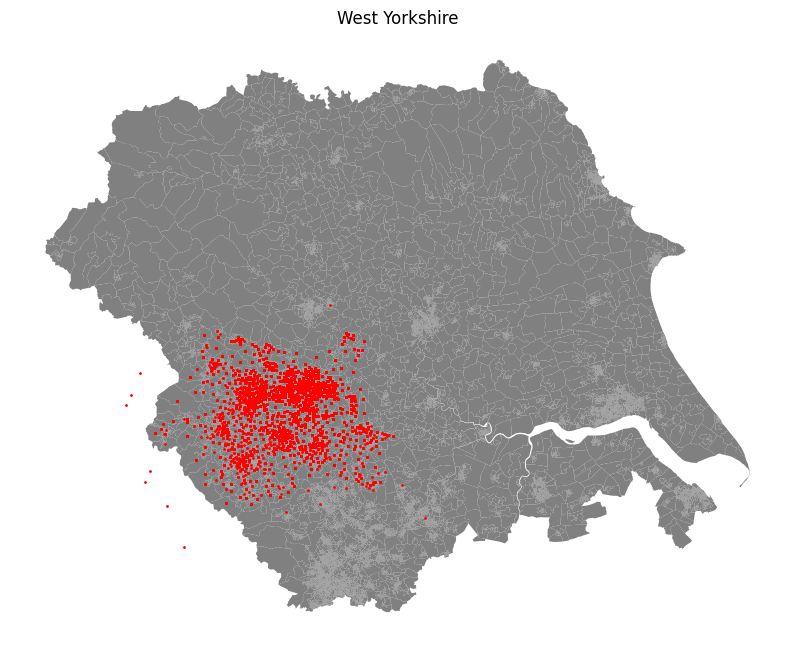

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.axis('off')
Yorkshire_and_Humber_boundaries.plot(ax=ax, color='gray')
#Yorkshire_and_Humber_boundaries.centroid.plot(ax=ax,color="blue",markersize=1)
workplace_gdf[workplace_gdf.id.isin(leeds_spc_people_hh.workplace.unique())].plot(ax=ax, color='red', markersize=1)
plt.title('West Yorkshire')
plt.show()

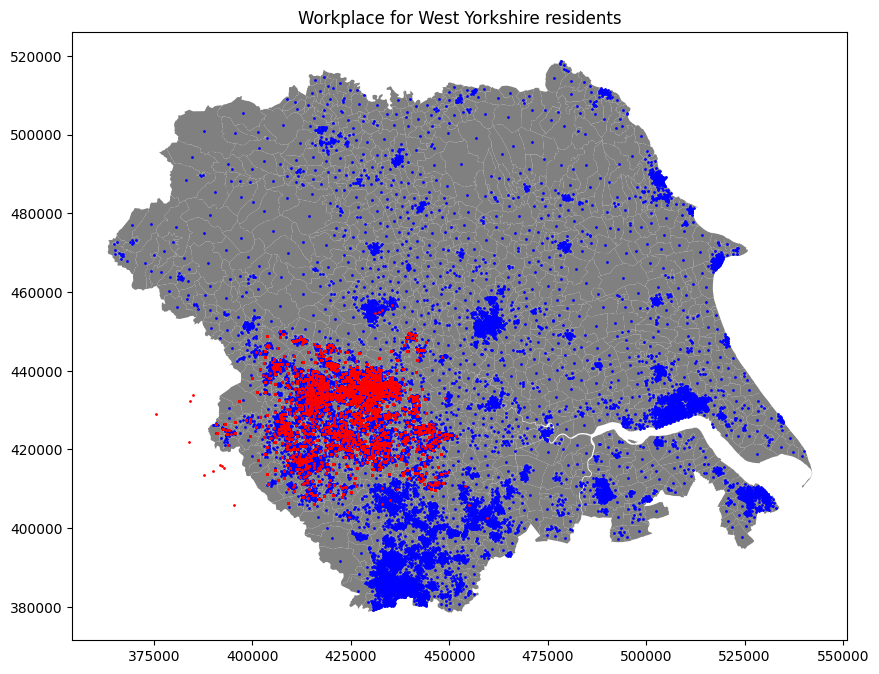

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
Yorkshire_and_Humber_boundaries.plot(ax=ax, color='gray')
Yorkshire_and_Humber_boundaries.centroid.plot(ax=ax,color="blue",markersize=1)
workplace_gdf[workplace_gdf.id.isin(leeds_spc_people_hh.workplace.unique())].plot(ax=ax, color='red', markersize=1)
plt.title('Workplace for West Yorkshire residents')
plt.show()

In [29]:
workplace_gdf[workplace_gdf.id.isin(leeds_spc_people_hh.workplace.unique())].geometry

2        POINT (408207.000 424277.102)
23       POINT (417748.560 416659.470)
30       POINT (440517.218 448168.278)
32       POINT (398532.499 395177.643)
33       POINT (434433.753 428188.843)
                     ...              
83819    POINT (431010.950 431810.070)
83820    POINT (431010.950 431810.070)
83821    POINT (430826.091 432465.456)
83822    POINT (431010.950 431810.070)
83823    POINT (432039.332 431171.828)
Name: geometry, Length: 38485, dtype: geometry

In [36]:
Yorkshire_and_Humber_boundaries

,OBJECTID,OA21CD,GlobalID,LSOA21CD,LSOA21NM,MSOA21CD,MSOA21NM,LEP22CD1,LEP22NM1,LAD22CD,LAD22NM,rgn22cd,rgn22nm,ctry22cd,ctry22nm,geometry
34845,34846,E00037085,40acc04d-2ce2-42ef-a7de-1aa7797691d3,E01007321,Barnsley 015B,E02001523,Barnsley 015,E37000054,South Yorkshire,E08000016,Barnsley,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((439112.094 406716.902, 439113...."
34846,34847,E00037086,f6917832-585b-4261-8f91-951b65271bad,E01007321,Barnsley 015B,E02001523,Barnsley 015,E37000054,South Yorkshire,E08000016,Barnsley,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((438490.371 405890.045, 438601...."
34847,34848,E00037087,721bee57-701f-41aa-8510-4cf37816a9af,E01007321,Barnsley 015B,E02001523,Barnsley 015,E37000054,South Yorkshire,E08000016,Barnsley,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((438416.835 405706.329, 438463...."
34848,34849,E00037088,31e31ee8-24cc-4c39-85f9-0cdeeae67108,E01007317,Barnsley 018A,E02001526,Barnsley 018,E37000054,South Yorkshire,E08000016,Barnsley,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((436628.451 404958.251, 436540...."
34849,34850,E00037089,92ca3ad0-9c1c-470c-aac4-6bb91fd0e19b,E01007317,Barnsley 018A,E02001526,Barnsley 018,E37000054,South Yorkshire,E08000016,Barnsley,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((436936.826 405299.679, 436809...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177921,177922,E00189911,4c86077a-32c5-4162-92e4-a7f0ee8b799d,E01027825,Scarborough 009B,E02005803,Scarborough 009,E37000058,York and North Yorkshire,E07000168,Scarborough,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((503349.146 486217.611, 503247...."
177922,177923,E00189912,7fbee8f0-83ef-436a-a8bf-b32397f496d2,E01027922,Selby 001E,E02005809,Selby 001,E37000058,York and North Yorkshire,E07000169,Selby,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((444928.976 444435.376, 444937...."
177923,177924,E00189913,6ff1e782-0f9f-4a52-862e-6c0a6be27d5c,E01034959,Hambleton 009E,E02005758,Hambleton 009,E37000058,York and North Yorkshire,E07000164,Hambleton,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((442160.572 481441.572, 442153...."
177924,177925,E00189914,a468a361-8b4a-4a70-b812-c2fdd7c2652a,E01034959,Hambleton 009E,E02005758,Hambleton 009,E37000058,York and North Yorkshire,E07000164,Hambleton,E12000003,Yorkshire and The Humber,E92000001,England,"MULTIPOLYGON (((442192.745 480822.367, 442068...."


In [37]:
workplace_gdf = gpd.sjoin(workplace_gdf, Yorkshire_and_Humber_boundaries[["MSOA21CD", "geometry"]], how='left', predicate='within').drop(columns="index_right")

In [38]:
workplace_gdf.index=workplace_gdf["id"]

In [51]:
workplace_gdf

,id,activity,location,urn,geometry,OA21CD,MSOA21CD
id,,,,,,,
0,0,0,"{'longitude': -2.3727805614471436, 'latitude':...",None,POINT (375518.969 428982.936),NaN,NaN
1,1,0,"{'longitude': -2.1356043815612793, 'latitude':...",None,POINT (391126.000 412853.062),NaN,NaN
2,2,0,"{'longitude': -1.877126693725586, 'latitude': ...",None,POINT (408207.000 424277.102),E00055310,E02002259
3,3,0,"{'longitude': -1.6319984197616577, 'latitude':...",None,POINT (424396.809 422066.959),E00175514,E02002287
4,4,0,"{'longitude': -1.6333471536636353, 'latitude':...",None,POINT (424311.249 421387.863),E00056720,E02002294
...,...,...,...,...,...,...,...
83390,83390,4,"{'longitude': -1.5308599472045898, 'latitude':...",None,POINT (431010.950 431810.070),E00187081,E02006876
83391,83391,4,"{'longitude': -1.5308599472045898, 'latitude':...",None,POINT (431010.950 431810.070),E00187081,E02006876
83392,83392,4,"{'longitude': -1.5335999727249146, 'latitude':...",None,POINT (430826.091 432465.456),E00170264,E02006876


In [50]:
#lookup the fit from msoa11cd to msoa21cd 
MSOA_11_to_21=pd.read_csv("../data_local/external/MSOA_(2011)_to_MSOA_(2021)_to_Local_Authority_District_(2022)_Lookup_for_England_and_Wales_-1574171694243467521.csv")
MSOA_11_to_21.set_index("MSOA21CD",inplace=True)
MSOA_11_to_21

,MSOA11CD,MSOA11NM,CHGIND,MSOA21NM,LAD22CD,LAD22NM,LAD22NMW,ObjectId
MSOA21CD,,,,,,,,
E02000001,E02000001,City of London 001,U,City of London 001,E09000001,City of London,NaN,1
E02000002,E02000002,Barking and Dagenham 001,U,Barking and Dagenham 001,E09000002,Barking and Dagenham,NaN,2
E02000003,E02000003,Barking and Dagenham 002,U,Barking and Dagenham 002,E09000002,Barking and Dagenham,NaN,3
E02000004,E02000004,Barking and Dagenham 003,U,Barking and Dagenham 003,E09000002,Barking and Dagenham,NaN,4
E02000005,E02000005,Barking and Dagenham 004,U,Barking and Dagenham 004,E09000002,Barking and Dagenham,NaN,5
...,...,...,...,...,...,...,...,...
W02000426,W02000086,Wrexham 009,M,Wrexham 023,W06000006,Wrexham,Wrecsam,7283
W02000427,W02000203,Neath Port Talbot 005,M,Neath Port Talbot 021,W06000012,Neath Port Talbot,Castell-nedd Port Talbot,7284
W02000427,W02000209,Neath Port Talbot 011,M,Neath Port Talbot 021,W06000012,Neath Port Talbot,Castell-nedd Port Talbot,7285


In [52]:
workplace_gdf=workplace_gdf.join(MSOA_11_to_21, on="MSOA21CD", how="left")
workplace_gdf

,id,activity,location,urn,geometry,OA21CD,MSOA21CD,MSOA11CD,MSOA11NM,CHGIND,MSOA21NM,LAD22CD,LAD22NM,LAD22NMW,ObjectId
id,,,,,,,,,,,,,,,
0,0,0,"{'longitude': -2.3727805614471436, 'latitude':...",None,POINT (375518.969 428982.936),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,"{'longitude': -2.1356043815612793, 'latitude':...",None,POINT (391126.000 412853.062),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,"{'longitude': -1.877126693725586, 'latitude': ...",None,POINT (408207.000 424277.102),E00055310,E02002259,E02002259,Calderdale 016,U,Calderdale 016,E08000033,Calderdale,NaN,2173.0
3,3,0,"{'longitude': -1.6319984197616577, 'latitude':...",None,POINT (424396.809 422066.959),E00175514,E02002287,E02002287,Kirklees 017,U,Kirklees 017,E08000034,Kirklees,NaN,2255.0
4,4,0,"{'longitude': -1.6333471536636353, 'latitude':...",None,POINT (424311.249 421387.863),E00056720,E02002294,E02002294,Kirklees 024,U,Kirklees 024,E08000034,Kirklees,NaN,2262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83390,83390,4,"{'longitude': -1.5308599472045898, 'latitude':...",None,POINT (431010.950 431810.070),E00187081,E02006876,E02006876,Leeds 112,U,Leeds 112,E08000035,Leeds,NaN,6604.0
83391,83391,4,"{'longitude': -1.5308599472045898, 'latitude':...",None,POINT (431010.950 431810.070),E00187081,E02006876,E02006876,Leeds 112,U,Leeds 112,E08000035,Leeds,NaN,6604.0
83392,83392,4,"{'longitude': -1.5335999727249146, 'latitude':...",None,POINT (430826.091 432465.456),E00170264,E02006876,E02006876,Leeds 112,U,Leeds 112,E08000035,Leeds,NaN,6604.0


In [58]:
Work_OA_list=workplace_gdf["OA21CD"]
Work_OA_list.name="Work_OA21CD"
Work_MSOA21CD_list=workplace_gdf["MSOA21CD"]
Work_MSOA21CD_list.name="Work_MSOA21CD"
Work_MSOA11CD_list=workplace_gdf["MSOA11CD"]
Work_MSOA11CD_list.name="Work_MSOA11CD"


In [59]:
spc_people_hh=spc_people_hh.join(Work_MSOA11CD_list,on="workplace",how="left")

In [61]:
spc_people_hh

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household,Work_MSOA21CD,Work_MSOA11CD
0,0,0,NaN,"{'sport': 0.09000000357627869, 'rugby': 0.1133...","[1583, 13161]","[1582, 13160]",E02002183_0001_001,11291218,1,2905399,...,2.0,True,2.0,2,1,86,1,1.0,NaN,NaN
1,1,1,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.3011...","[2900, 4948, 4972, 7424, 10284, 10586, 12199, ...","[2901, 4949, 4973, 7425, 10285, 10585, 12198, ...",E02002183_0002_001,17291219,1,2905308,...,6.0,True,2.0,2,1,74,3,1.0,NaN,NaN
2,2,1,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.1768...","[3010, 6389, 9448, 10184, 11598]","[3011, 6388, 9447, 10183, 11599]",E02002183_0002_002,17070713,2,2907681,...,6.0,True,2.0,2,2,68,1,2.0,NaN,NaN
3,3,2,64060.0,"{'sport': 0.2329999953508377, 'rugby': 0.14678...","[366, 867, 2096, 3678, 5212, 5450, 8145, 9254,...","[365, 868, 2097, 3677, 5213, 5451, 8146, 9253,...",E02002183_0003_001,20310313,1,2902817,...,6.0,True,2.0,1,1,27,1,4.0,E02002424,E02002424
4,4,2,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[1289, 12528, 12870]","[1288, 12529, 12871]",E02002183_0003_002,13010909,3,2900884,...,6.0,True,2.0,1,2,26,1,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339926,2339926,963456,83347.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,6.0,True,1.0,1,1,39,1,3.0,E02006876,E02006876
2339927,2339927,963457,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[1611, 2074, 3331, 3973, 5305, 7241, 9500, 10413]","[1610, 2075, 3330, 3974, 5304, 7240, 9499, 10412]",E02006876_3659_001,12080913,2,2903691,...,5.0,False,1.0,0,2,51,1,7.0,NaN,NaN
2339928,2339928,963458,NaN,"{'sport': 0.18799999356269836, 'rugby': 0.1184...","[1768, 1833, 2004, 3538, 5690, 5693, 9177, 112...","[1767, 1832, 2005, 3537, 5691, 5692, 9176, 112...",E02006876_3660_001,15291209,1,2905917,...,2.0,True,5.0,0,1,82,1,NaN,NaN,NaN
2339929,2339929,963459,NaN,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[2173, 14404, 15340, 16376]","[2174, 14403, 15339, 16377]",E02006876_3661_001,20280416,1,2907191,...,3.0,True,5.0,0,1,38,1,2.0,NaN,NaN


In [42]:
leeds_spc_people_hh=leeds_spc_people_hh.join(Work_MSOA21CD_list,on="workplace")

In [78]:
leeds_spc_people_hh

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household,Work_OA21CD
1192981,1192981,479310,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.3011...","[954, 1037, 1234, 2981, 6290, 9535, 10385, 106...","[955, 1036, 1235, 2980, 6291, 9536, 10384, 106...",E02002330_0001_001,34051017,1,2911721,...,NaN,6.0,True,2.0,2,1,68,1,1.0,NaN
1192982,1192982,479310,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.0884...","[3435, 6069, 13203, 14704]","[3436, 6068, 13202, 14703]",E02002330_0001_002,21040818,1,2904618,...,NaN,6.0,True,2.0,2,2,65,1,6.0,NaN
1192983,1192983,479311,NaN,"{'sport': 0.09000000357627869, 'rugby': 0.1133...","[762, 5168, 6201, 8977]","[761, 5169, 6200, 8976]",E02002330_0002_001,11131017,1,2902311,...,NaN,5.0,True,1.0,2,1,86,1,2.0,NaN
1192984,1192984,479312,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.16884...","[1580, 5417, 5956, 12901]","[1581, 5416, 5957, 12900]",E02002330_0003_001,15020311,1,2911131,...,NaN,6.0,True,2.0,1,1,58,1,4.0,NaN
1192985,1192985,479312,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[318, 3145, 10496, 12819, 13943]","[319, 3144, 10495, 12818, 13942]",E02002330_0003_002,20090607,1,2909582,...,NaN,6.0,True,2.0,1,2,56,1,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00053695
2339927,2339927,963457,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[1611, 2074, 3331, 3973, 5305, 7241, 9500, 10413]","[1610, 2075, 3330, 3974, 5304, 7240, 9499, 10412]",E02006876_3659_001,12080913,2,2903691,...,NaN,5.0,False,1.0,0,2,51,1,7.0,NaN
2339928,2339928,963458,NaN,"{'sport': 0.18799999356269836, 'rugby': 0.1184...","[1768, 1833, 2004, 3538, 5690, 5693, 9177, 112...","[1767, 1832, 2005, 3537, 5691, 5692, 9176, 112...",E02006876_3660_001,15291209,1,2905917,...,NaN,2.0,True,5.0,0,1,82,1,NaN,NaN
2339929,2339929,963459,NaN,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[2173, 14404, 15340, 16376]","[2174, 14403, 15339, 16377]",E02006876_3661_001,20280416,1,2907191,...,NaN,3.0,True,5.0,0,1,38,1,2.0,NaN


In [50]:
group=leeds_spc_people_hh

In [51]:
OD_matrix=group.groupby("oa11cd").apply(lambda x: x.value_counts("Work_OA21CD")).reset_index()

/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_24446/3504981652.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  OD_matrix=group.groupby("oa11cd").apply(lambda x: x.value_counts("Work_OA21CD")).reset_index()


In [52]:
OD_matrix["count"].sum()

201358

In [53]:
leeds_spc_people_hh_work=leeds_spc_people_hh[~leeds_spc_people_hh["workplace"].isna()]

In [77]:
leeds_spc_people_hh_work

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household,OA21CD_to
1192988,1192988,479313,41309.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[897, 2452, 4371, 4882, 6353, 8563, 9226, 1263...","[898, 2453, 4372, 4883, 6352, 8562, 9227, 1263...",E02002330_0004_002,44051001,2,2910128,...,NaN,5.0,False,2.0,2,2,56,1,2.0,E00059044
1192990,1192990,479314,40355.0,"{'sport': 0.27900001406669617, 'rugby': 0.2064...","[2746, 3667, 6718, 9441, 10161, 11869, 13638, ...","[2747, 3668, 6719, 9442, 10162, 11868, 13639, ...",E02002330_0005_002,52051016,2,2901384,...,NaN,5.0,True,2.0,1,2,51,1,2.0,E00059034
1192993,1192993,479315,41331.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[818, 825, 2201, 2707, 3259, 4190, 4866, 5517,...","[817, 826, 2200, 2706, 3258, 4189, 4867, 5516,...",E02002330_0006_002,16081219,2,2905273,...,NaN,6.0,True,1.0,1,2,55,1,3.0,E00059025
1192994,1192994,479316,40673.0,"{'sport': 0.2549999952316284, 'rugby': 0.16064...","[1796, 2877, 4451, 5231, 5497, 6073, 6593, 669...","[1795, 2876, 4452, 5230, 5496, 6072, 6592, 669...",E02002330_0007_001,13291204,2,2907891,...,NaN,6.0,True,4.0,1,1,44,1,6.0,E00187086
1193005,1193005,479319,42814.0,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[7138, 14253, 15176, 16288]","[7139, 14252, 15175, 16289]",E02002330_0010_003,18140404,1,2907584,...,NaN,6.0,True,1.0,2,1,16,1,8.0,E00058995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00054044
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00054583
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00038068
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00053695


In [54]:
leeds_spc_people_hh_work[leeds_spc_people_hh_work["num_cars"]>0]

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household,Work_OA21CD
1192988,1192988,479313,41309.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[897, 2452, 4371, 4882, 6353, 8563, 9226, 1263...","[898, 2453, 4372, 4883, 6352, 8562, 9227, 1263...",E02002330_0004_002,44051001,2,2910128,...,NaN,5.0,False,2.0,2,2,56,1,2.0,E00059044
1192990,1192990,479314,40355.0,"{'sport': 0.27900001406669617, 'rugby': 0.2064...","[2746, 3667, 6718, 9441, 10161, 11869, 13638, ...","[2747, 3668, 6719, 9442, 10162, 11868, 13639, ...",E02002330_0005_002,52051016,2,2901384,...,NaN,5.0,True,2.0,1,2,51,1,2.0,E00059034
1192993,1192993,479315,41331.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[818, 825, 2201, 2707, 3259, 4190, 4866, 5517,...","[817, 826, 2200, 2706, 3258, 4189, 4867, 5516,...",E02002330_0006_002,16081219,2,2905273,...,NaN,6.0,True,1.0,1,2,55,1,3.0,E00059025
1192994,1192994,479316,40673.0,"{'sport': 0.2549999952316284, 'rugby': 0.16064...","[1796, 2877, 4451, 5231, 5497, 6073, 6593, 669...","[1795, 2876, 4452, 5230, 5496, 6072, 6592, 669...",E02002330_0007_001,13291204,2,2907891,...,NaN,6.0,True,4.0,1,1,44,1,6.0,E00187086
1193005,1193005,479319,42814.0,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[7138, 14253, 15176, 16288]","[7139, 14252, 15175, 16289]",E02002330_0010_003,18140404,1,2907584,...,NaN,6.0,True,1.0,2,1,16,1,8.0,E00058995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339921,2339921,963452,83332.0,"{'sport': 0.25699999928474426, 'rugby': 0.1901...","[5633, 15844]","[5632, 15845]",E02006876_3654_001,14260118,1,2908377,...,NaN,5.0,True,1.0,1,2,22,2,1.0,E00187081
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00054044
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00054583
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00038068


In [55]:
Leeds_OD_matrix=OD_matrix[(OD_matrix["oa11cd"].isin(list(Leeds_boundaries.OA21CD))) & (OD_matrix["Work_OA21CD"].isin(list(Leeds_boundaries.OA21CD)))]

In [56]:
Leeds_OD_matrix["count"].sum()

167086

In [58]:
Leeds_OD_matrix

,oa11cd,Work_OA21CD,count
0,E00056750,E00056756,7
1,E00056750,E00187137,5
2,E00056750,E00056752,5
3,E00056750,E00187029,5
4,E00056750,E00058309,4
...,...,...,...
100588,E00170890,E00057556,1
100589,E00170890,E00057502,1
100590,E00170890,E00057288,1
100591,E00170890,E00056961,1


In [59]:
travel_times = pd.read_parquet('../data/external/travel_times/oa/travel_time_matrix_acbm.parquet')
travel_times.head(10)

,from_id,to_id,travel_time_p25,travel_time_p50,travel_time_p75,combination
0,53507,53507,0,0.0,0.0,pt_wkday_morning
1,53507,53508,24,29.0,34.0,pt_wkday_morning
2,53507,53509,17,22.0,27.0,pt_wkday_morning
3,53507,53510,12,14.0,16.0,pt_wkday_morning
4,53507,53511,14,16.0,18.0,pt_wkday_morning
5,53507,53512,10,10.0,10.0,pt_wkday_morning
6,53507,53513,11,13.0,15.0,pt_wkday_morning
7,53507,53514,23,25.0,28.0,pt_wkday_morning
8,53507,53515,31,36.0,41.0,pt_wkday_morning
9,53507,53516,34,39.0,44.0,pt_wkday_morning


In [60]:
# convert from_id and to_id to int to match the boundaries data type
travel_times = travel_times.astype({'from_id': int, 'to_id': int})

# merge travel_times with boundaries
travel_times = travel_times.merge(boundaries[['OBJECTID', 'OA21CD']], left_on='from_id', right_on='OBJECTID', how='left')
travel_times = travel_times.drop(columns='OBJECTID')

travel_times = travel_times.merge(boundaries[['OBJECTID', 'OA21CD']], left_on='to_id', right_on='OBJECTID', how='left', suffixes=('_from', '_to'))
travel_times = travel_times.drop(columns='OBJECTID')

travel_times.head(10)

,from_id,to_id,travel_time_p25,travel_time_p50,travel_time_p75,combination,OA21CD_from,OA21CD_to
0,53507,53507,0,0.0,0.0,pt_wkday_morning,E00056750,E00056750
1,53507,53508,24,29.0,34.0,pt_wkday_morning,E00056750,E00056751
2,53507,53509,17,22.0,27.0,pt_wkday_morning,E00056750,E00056752
3,53507,53510,12,14.0,16.0,pt_wkday_morning,E00056750,E00056753
4,53507,53511,14,16.0,18.0,pt_wkday_morning,E00056750,E00056754
5,53507,53512,10,10.0,10.0,pt_wkday_morning,E00056750,E00056755
6,53507,53513,11,13.0,15.0,pt_wkday_morning,E00056750,E00056756
7,53507,53514,23,25.0,28.0,pt_wkday_morning,E00056750,E00056757
8,53507,53515,31,36.0,41.0,pt_wkday_morning,E00056750,E00056758
9,53507,53516,34,39.0,44.0,pt_wkday_morning,E00056750,E00056759


In [61]:
travel_times.dropna(how="any")

,from_id,to_id,travel_time_p25,travel_time_p50,travel_time_p75,combination,OA21CD_from,OA21CD_to
0,53507,53507,0,0.0,0.0,pt_wkday_morning,E00056750,E00056750
1,53507,53508,24,29.0,34.0,pt_wkday_morning,E00056750,E00056751
2,53507,53509,17,22.0,27.0,pt_wkday_morning,E00056750,E00056752
3,53507,53510,12,14.0,16.0,pt_wkday_morning,E00056750,E00056753
4,53507,53511,14,16.0,18.0,pt_wkday_morning,E00056750,E00056754
...,...,...,...,...,...,...,...,...
36424170,175164,175158,52,52.0,52.0,cycle,E00187153,E00187147
36424171,175164,175160,13,13.0,13.0,cycle,E00187153,E00187149
36424172,175164,175161,90,90.0,90.0,cycle,E00187153,E00187150
36424173,175164,175163,15,15.0,15.0,cycle,E00187153,E00187152


In [62]:
leeds_spc_people_hh_work=leeds_spc_people_hh_work.rename(columns={"oa11cd":"OA21CD_from","Work_OA21CD":"OA21CD_to"})

In [63]:
leeds_spc_people_hh_work

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household,OA21CD_to
1192988,1192988,479313,41309.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[897, 2452, 4371, 4882, 6353, 8563, 9226, 1263...","[898, 2453, 4372, 4883, 6352, 8562, 9227, 1263...",E02002330_0004_002,44051001,2,2910128,...,NaN,5.0,False,2.0,2,2,56,1,2.0,E00059044
1192990,1192990,479314,40355.0,"{'sport': 0.27900001406669617, 'rugby': 0.2064...","[2746, 3667, 6718, 9441, 10161, 11869, 13638, ...","[2747, 3668, 6719, 9442, 10162, 11868, 13639, ...",E02002330_0005_002,52051016,2,2901384,...,NaN,5.0,True,2.0,1,2,51,1,2.0,E00059034
1192993,1192993,479315,41331.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[818, 825, 2201, 2707, 3259, 4190, 4866, 5517,...","[817, 826, 2200, 2706, 3258, 4189, 4867, 5516,...",E02002330_0006_002,16081219,2,2905273,...,NaN,6.0,True,1.0,1,2,55,1,3.0,E00059025
1192994,1192994,479316,40673.0,"{'sport': 0.2549999952316284, 'rugby': 0.16064...","[1796, 2877, 4451, 5231, 5497, 6073, 6593, 669...","[1795, 2876, 4452, 5230, 5496, 6072, 6592, 669...",E02002330_0007_001,13291204,2,2907891,...,NaN,6.0,True,4.0,1,1,44,1,6.0,E00187086
1193005,1193005,479319,42814.0,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[7138, 14253, 15176, 16288]","[7139, 14252, 15175, 16289]",E02002330_0010_003,18140404,1,2907584,...,NaN,6.0,True,1.0,2,1,16,1,8.0,E00058995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00054044
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00054583
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00038068
2339926,2339926,963456,55.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,NaN,6.0,True,1.0,1,1,39,1,3.0,E00053695


In [64]:
leeds_spc_people_hh_work_with_time = pd.merge(leeds_spc_people_hh_work, travel_times.dropna(how="any"),  how='left', left_on=['OA21CD_from','OA21CD_to'], right_on = ['OA21CD_from','OA21CD_to'])

In [65]:
leeds_spc_people_hh_work_with_time=leeds_spc_people_hh_work_with_time[~leeds_spc_people_hh_work_with_time["travel_time_p50"].isna()]

In [66]:
leeds_spc_people_hh_work_with_time=leeds_spc_people_hh_work_with_time[leeds_spc_people_hh_work_with_time['travel_time_p25']>0]

In [67]:
leeds_spc_people_hh_work_with_time=leeds_spc_people_hh_work_with_time.drop_duplicates("id")

In [68]:
leeds_spc_people_hh_work_with_time.columns

Index(['id', 'household', 'workplace', 'events', 'weekday_diaries',
       'weekend_diaries', 'orig_pid', 'id_tus_hh', 'id_tus_p', 'pid_hs',
       'msoa11cd', 'OA21CD_from', 'members', 'bmi',
       'has_cardiovascular_disease', 'has_diabetes', 'has_high_blood_pressure',
       'number_medications', 'self_assessed_health', 'life_satisfaction',
       'sic1d2007', 'sic2d2007', 'soc2010', 'pwkstat', 'salary_yearly',
       'salary_hourly', 'hid', 'nssec8', 'accommodation_type', 'communal_type',
       'num_rooms', 'central_heat', 'tenure', 'num_cars', 'sex', 'age_years',
       'ethnicity', 'nssec8_household', 'OA21CD_to', 'from_id', 'to_id',
       'travel_time_p25', 'travel_time_p50', 'travel_time_p75', 'combination'],
      dtype='object')

array([[<Axes: title={'center': 'travel_time_p50'}>]], dtype=object)

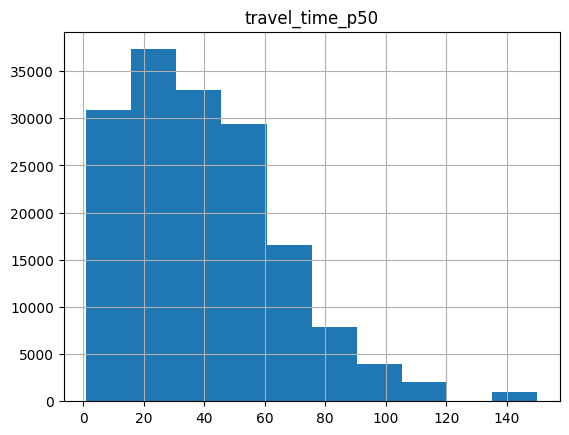

In [69]:
leeds_spc_people_hh_work_with_time.hist("travel_time_p50")

In [76]:
leeds_spc_people_hh_work_with_time

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,age_years,ethnicity,nssec8_household,OA21CD_to,from_id,to_id,travel_time_p25,travel_time_p50,travel_time_p75,combination
0,1192988,479313,41309.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[897, 2452, 4371, 4882, 6353, 8563, 9226, 1263...","[898, 2453, 4372, 4883, 6352, 8562, 9227, 1263...",E02002330_0004_002,44051001,2,2910128,...,56,1,2.0,E00059044,55651.0,55663.0,29.0,56.0,61.0,pt_wkday_morning
16,1192993,479315,41331.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[818, 825, 2201, 2707, 3259, 4190, 4866, 5517,...","[817, 826, 2200, 2706, 3258, 4189, 4867, 5516,...",E02002330_0006_002,16081219,2,2905273,...,55,1,3.0,E00059025,55647.0,55644.0,6.0,6.0,6.0,car
18,1192994,479316,40673.0,"{'sport': 0.2549999952316284, 'rugby': 0.16064...","[1796, 2877, 4451, 5231, 5497, 6073, 6593, 669...","[1795, 2876, 4452, 5230, 5496, 6072, 6592, 669...",E02002330_0007_001,13291204,2,2907891,...,44,1,6.0,E00187086,55647.0,175097.0,58.0,63.0,68.0,pt_wkday_morning
23,1193005,479319,42814.0,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[7138, 14253, 15176, 16288]","[7139, 14252, 15175, 16289]",E02002330_0010_003,18140404,1,2907584,...,16,1,8.0,E00058995,55664.0,55615.0,11.0,11.0,11.0,car
25,1193009,479321,41337.0,"{'sport': 0.2329999953508377, 'rugby': 0.17241...","[140, 6582, 9049, 9672, 10775, 15065]","[141, 6583, 9048, 9671, 10776, 15066]",E02002330_0012_002,21210415,1,2906845,...,32,1,2.0,E00059025,55641.0,55644.0,6.0,6.0,6.0,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059978,2339902,963442,82711.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3644_001,14280415,1,2912145,...,38,1,3.0,E00187098,160655.0,175109.0,9.0,9.0,9.0,pt_wkday_morning
1059989,2339909,963445,83270.0,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[2952, 5958, 6801, 8104, 8174, 8704, 9572, 108...","[2953, 5959, 6800, 8105, 8173, 8705, 9571, 108...",E02006876_3647_002,15020312,1,2908995,...,25,1,8.0,E00187081,54521.0,175092.0,3.0,3.0,3.0,pt_wkday_morning
1060003,2339918,963450,81135.0,"{'sport': 0.2329999953508377, 'rugby': 0.17241...","[164, 236, 276, 295, 517, 869, 1213, 1275, 129...","[165, 237, 277, 294, 518, 870, 1212, 1274, 129...",E02006876_3652_002,18190109,2,2901960,...,25,1,3.0,E00187074,54494.0,175085.0,40.0,45.0,47.0,pt_wkday_morning
1060010,2339919,963451,81247.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3653_001,18050107,1,2904140,...,38,1,3.0,E00187029,54520.0,175040.0,15.0,17.0,18.0,pt_wkday_morning


In [72]:
group=leeds_spc_people_hh_work_with_time[["OA21CD_from","OA21CD_to","travel_time_p50"]].dropna(how='any')

In [71]:
group.groupby("OA21CD_from").apply(lambda x: x.value_counts("OA21CD_to")).reset_index()

/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_24446/2856773130.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group.groupby("OA21CD_from").apply(lambda x: x.value_counts("OA21CD_to")).reset_index()


,OA21CD_from,OA21CD_to,count
0,E00056750,E00056756,7
1,E00056750,E00187137,5
2,E00056750,E00187029,5
3,E00056750,E00056752,5
4,E00056750,E00058309,4
...,...,...,...
74329,E00170890,E00170055,1
74330,E00170890,E00057288,1
74331,E00170890,E00187081,1
74332,E00170890,E00187086,1


In [73]:
MSOA_travel_time=group.drop(columns="OA21CD_to").groupby("OA21CD_from").agg("mean")

In [75]:
MSOA_travel_time

,travel_time_p50
OA21CD_from,
E00056750,39.912281
E00056751,48.096154
E00056752,48.118421
E00056753,36.426230
E00056754,40.900000
...,...
E00170623,35.875000
E00170887,43.970803
E00170888,16.400000


In [ ]:
leeds_spc_people_hh_work_with_time.groupby()

## Validation the SPC with NTS

In [87]:
# Read in the spc data (parquet format)
nts_trips = pd.read_parquet('../data/interim/matching/spc_with_nts_trips.parquet')

nts_trips.head()

,id,household,pid_hs,msoa11cd,oa11cd,members,sic1d2007,sic2d2007,pwkstat,salary_yearly,...,tst,tet,TripDisIncSW,TripDisExSW,TripTotalTime,TripTravTime,ozone,dzone,W5,W5xHH
0,0,0,2905399,E02002183,E00053954,[0],J,58.0,6,NaN,...,1050.0,1055.0,1.0,1.0,5.0,5.0,9.0,9.0,0.508840,1.000000
1,0,0,2905399,E02002183,E00053954,[0],J,58.0,6,NaN,...,1060.0,1070.0,0.5,0.0,10.0,10.0,9.0,9.0,0.487430,0.957925
2,0,0,2905399,E02002183,E00053954,[0],J,58.0,6,NaN,...,435.0,440.0,1.0,1.0,5.0,3.0,9.0,9.0,0.587105,1.153811
3,0,0,2905399,E02002183,E00053954,[0],J,58.0,6,NaN,...,495.0,500.0,1.0,1.0,5.0,3.0,9.0,9.0,0.587105,1.153811
4,0,0,2905399,E02002183,E00053954,[0],J,58.0,6,NaN,...,660.0,665.0,1.0,1.0,5.0,5.0,9.0,9.0,0.700547,1.376752


In [89]:
nts_trips.columns

Index(['id', 'household', 'pid_hs', 'msoa11cd', 'oa11cd', 'members',
       'sic1d2007', 'sic2d2007', 'pwkstat', 'salary_yearly', 'salary_hourly',
       'hid', 'accommodation_type', 'communal_type', 'num_rooms',
       'central_heat', 'tenure', 'num_cars', 'sex', 'age_years', 'ethnicity',
       'nssec8', 'salary_yearly_hh', 'salary_yearly_hh_cat', 'is_adult',
       'num_adults', 'is_child', 'num_children', 'is_pension_age',
       'num_pension_age', 'pwkstat_FT_hh', 'pwkstat_PT_hh',
       'pwkstat_NTS_match', 'OA11CD', 'RUC11', 'RUC11CD',
       'Settlement2011EW_B03ID_spc', 'Settlement2011EW_B04ID_spc',
       'Settlement2011EW_B03ID_spc_CD', 'Settlement2011EW_B04ID_spc_CD',
       'tenure_spc_for_matching', 'nts_hh_id', 'age_group', 'nts_ind_id',
       'TripID', 'DayID', 'IndividualID', 'HouseholdID', 'PSUID', 'PersNo',
       'TravDay', 'seq', 'ShortWalkTrip_B01ID', 'NumStages', 'MainMode_B03ID',
       'mode', 'oact', 'dact', 'TripPurpose_B04ID', 'tst', 'tet',
       'TripDisI

In [91]:
path = "../data/external/spc_output_no_sic_code_matching/raw/"
region = "west-yorkshire"
spc_new = Reader(path, region, backend="pandas", input_type="parquet")
spc_people_new_hh = (
    Builder(path, region, backend="pandas", input_type="parquet")
    .add_households()
    .unnest(["health", "employment", "details", "demographics"], rsuffix="_household")
    .build()
)

In [92]:
spc_people_new_hh

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
0,0,0,NaN,"{'sport': 0.09000000357627869, 'rugby': 0.1133...","[1583, 13161]","[1582, 13160]",E02002183_0001_001,11291218,1,2905399,...,1.0,NaN,2.0,True,2.0,2,1,86,1,1.0
1,1,1,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.3011...","[2900, 4948, 4972, 7424, 10284, 10586, 12199, ...","[2901, 4949, 4973, 7425, 10285, 10585, 12198, ...",E02002183_0002_001,17291219,1,2905308,...,3.0,NaN,6.0,True,2.0,2,1,74,3,1.0
2,2,1,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.1768...","[3010, 6389, 9448, 10184, 11598]","[3011, 6388, 9447, 10183, 11599]",E02002183_0002_002,17070713,2,2907681,...,3.0,NaN,6.0,True,2.0,2,2,68,1,2.0
3,3,2,64060.0,"{'sport': 0.2329999953508377, 'rugby': 0.14678...","[366, 867, 2096, 3678, 5212, 5450, 8145, 9254,...","[365, 868, 2097, 3677, 5213, 5451, 8146, 9253,...",E02002183_0003_001,20310313,1,2902817,...,3.0,NaN,6.0,True,2.0,1,1,27,1,4.0
4,4,2,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[1289, 12528, 12870]","[1288, 12529, 12871]",E02002183_0003_002,13010909,3,2900884,...,3.0,NaN,6.0,True,2.0,1,2,26,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339926,2339926,963456,83347.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,3.0,NaN,6.0,True,1.0,1,1,39,1,3.0
2339927,2339927,963457,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[1611, 2074, 3331, 3973, 5305, 7241, 9500, 10413]","[1610, 2075, 3330, 3974, 5304, 7240, 9499, 10412]",E02006876_3659_001,12080913,2,2903691,...,2.0,NaN,5.0,False,1.0,0,2,51,1,7.0
2339928,2339928,963458,NaN,"{'sport': 0.18799999356269836, 'rugby': 0.1184...","[1768, 1833, 2004, 3538, 5690, 5693, 9177, 112...","[1767, 1832, 2005, 3537, 5691, 5692, 9176, 112...",E02006876_3660_001,15291209,1,2905917,...,4.0,NaN,2.0,True,5.0,0,1,82,1,NaN
2339929,2339929,963459,NaN,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[2173, 14404, 15340, 16376]","[2174, 14403, 15339, 16377]",E02006876_3661_001,20280416,1,2907191,...,4.0,NaN,3.0,True,5.0,0,1,38,1,2.0


In [94]:
leeds_spc_people_new_hh=spc_people_new_hh[spc_people_new_hh.msoa11cd.isin(Leeds_list)]
leeds_spc_people_new_hh

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
1192981,1192981,479310,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.3011...","[954, 1037, 1234, 2981, 6290, 9535, 10385, 106...","[955, 1036, 1235, 2980, 6291, 9536, 10384, 106...",E02002330_0001_001,34051017,1,2911721,...,2.0,NaN,6.0,True,2.0,2,1,68,1,1.0
1192982,1192982,479310,NaN,"{'sport': 0.23899999260902405, 'rugby': 0.0884...","[3435, 6069, 13203, 14704]","[3436, 6068, 13202, 14703]",E02002330_0001_002,21040818,1,2904618,...,2.0,NaN,6.0,True,2.0,2,2,65,1,6.0
1192983,1192983,479311,NaN,"{'sport': 0.09000000357627869, 'rugby': 0.1133...","[762, 5168, 6201, 8977]","[761, 5169, 6200, 8976]",E02002330_0002_001,11131017,1,2902311,...,1.0,NaN,5.0,True,1.0,2,1,86,1,2.0
1192984,1192984,479312,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.16884...","[1580, 5417, 5956, 12901]","[1581, 5416, 5957, 12900]",E02002330_0003_001,15020311,1,2911131,...,1.0,NaN,6.0,True,2.0,1,1,58,1,4.0
1192985,1192985,479312,41330.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[318, 3145, 10496, 12819, 13943]","[319, 3144, 10495, 12818, 13942]",E02002330_0003_002,20090607,1,2909582,...,1.0,NaN,6.0,True,2.0,1,2,56,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339926,2339926,963456,83347.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,3.0,NaN,6.0,True,1.0,1,1,39,1,3.0
2339927,2339927,963457,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[1611, 2074, 3331, 3973, 5305, 7241, 9500, 10413]","[1610, 2075, 3330, 3974, 5304, 7240, 9499, 10412]",E02006876_3659_001,12080913,2,2903691,...,2.0,NaN,5.0,False,1.0,0,2,51,1,7.0
2339928,2339928,963458,NaN,"{'sport': 0.18799999356269836, 'rugby': 0.1184...","[1768, 1833, 2004, 3538, 5690, 5693, 9177, 112...","[1767, 1832, 2005, 3537, 5691, 5692, 9176, 112...",E02006876_3660_001,15291209,1,2905917,...,4.0,NaN,2.0,True,5.0,0,1,82,1,NaN
2339929,2339929,963459,NaN,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[2173, 14404, 15340, 16376]","[2174, 14403, 15339, 16377]",E02006876_3661_001,20280416,1,2907191,...,4.0,NaN,3.0,True,5.0,0,1,38,1,2.0


In [95]:
leeds_spc_people_new_hh[(leeds_spc_people_new_hh.workplace>0)]

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
1192985,1192985,479312,41330.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[318, 3145, 10496, 12819, 13943]","[319, 3144, 10495, 12818, 13942]",E02002330_0003_002,20090607,1,2909582,...,1.0,NaN,6.0,True,2.0,1,2,56,1,1.0
1192990,1192990,479314,41240.0,"{'sport': 0.27900001406669617, 'rugby': 0.2064...","[2746, 3667, 6718, 9441, 10161, 11869, 13638, ...","[2747, 3668, 6719, 9442, 10162, 11868, 13639, ...",E02002330_0005_002,52051016,2,2901384,...,1.0,NaN,5.0,True,2.0,1,2,51,1,2.0
1192992,1192992,479315,41103.0,"{'sport': 0.2680000066757202, 'rugby': 0.16884...","[877, 1139, 2067, 2282, 4320, 4556, 6217, 6940...","[878, 1138, 2066, 2283, 4319, 4557, 6216, 6939...",E02002330_0006_001,11151212,1,2906244,...,1.0,NaN,6.0,True,1.0,1,1,56,1,6.0
1192993,1192993,479315,40385.0,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[818, 825, 2201, 2707, 3259, 4190, 4866, 5517,...","[817, 826, 2200, 2706, 3258, 4189, 4867, 5516,...",E02002330_0006_002,16081219,2,2905273,...,1.0,NaN,6.0,True,1.0,1,2,55,1,3.0
1192994,1192994,479316,48738.0,"{'sport': 0.2549999952316284, 'rugby': 0.16064...","[1796, 2877, 4451, 5231, 5497, 6073, 6593, 669...","[1795, 2876, 4452, 5230, 5496, 6072, 6592, 669...",E02002330_0007_001,13291204,2,2907891,...,2.0,NaN,6.0,True,4.0,1,1,44,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339919,2339919,963451,83335.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3653_001,18050107,1,2904140,...,2.0,NaN,4.0,True,5.0,1,1,38,1,3.0
2339920,2339920,963451,78598.0,"{'sport': 0.2329999953508377, 'rugby': 0.17241...","[337, 485, 987, 3007, 3020, 3185, 3385, 5493, ...","[338, 486, 986, 3006, 3021, 3184, 3384, 5492, ...",E02006876_3653_002,53051001,2,2901241,...,2.0,NaN,4.0,True,5.0,1,2,25,1,2.0
2339921,2339921,963452,83386.0,"{'sport': 0.25699999928474426, 'rugby': 0.1901...","[5633, 15844]","[5632, 15845]",E02006876_3654_001,14260118,1,2908377,...,3.0,NaN,5.0,True,1.0,1,2,22,2,1.0
2339926,2339926,963456,83347.0,"{'sport': 0.2549999952316284, 'rugby': 0.32129...","[253, 904, 960, 1258, 1666, 1827, 2990, 3158, ...","[252, 903, 961, 1259, 1667, 1826, 2991, 3159, ...",E02006876_3658_001,15171109,2,2910202,...,3.0,NaN,6.0,True,1.0,1,1,39,1,3.0


In [98]:
working_age_population_new=spc_people_new_hh[(spc_people_new_hh['age_years']>=16) & (spc_people_new_hh['age_years']<=65)]
no_workplace_new=working_age_population_new[~(working_age_population_new.workplace>0)]

In [99]:
no_workplace_new

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
4,4,2,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[1289, 12528, 12870]","[1288, 12529, 12871]",E02002183_0003_002,13010909,3,2900884,...,3.0,NaN,6.0,True,2.0,1,2,26,1,6.0
7,7,4,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.3515...","[10159, 13462]","[10160, 13463]",E02002183_0005_002,11070713,2,2910111,...,1.0,NaN,6.0,True,2.0,2,1,54,1,1.0
14,14,8,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1757...","[610, 914, 1225, 2161, 2658, 2688, 2780, 3105,...","[609, 913, 1224, 2162, 2659, 2689, 2781, 3104,...",E02002183_0009_001,25051011,2,2908098,...,3.0,NaN,6.0,True,1.0,2,1,51,1,5.0
16,16,9,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.33768...",[1003],[1002],E02002183_0010_001,11171114,1,2902611,...,1.0,NaN,6.0,True,2.0,2,1,64,1,1.0
17,17,9,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[370, 704, 1771, 1817, 1866, 2240, 2268, 2412,...","[369, 703, 1772, 1816, 1867, 2241, 2269, 2413,...",E02002183_0010_002,18070401,1,2908273,...,1.0,NaN,6.0,True,2.0,2,2,61,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339922,2339922,963452,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[398, 3289, 3313, 4490, 5528, 6203, 6240, 6244...","[397, 3288, 3312, 4489, 5529, 6202, 6241, 6245...",E02006876_3654_002,15081209,4,2903410,...,3.0,NaN,5.0,True,1.0,1,1,21,1,NaN
2339924,2339924,963454,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[318, 3145, 10496, 12819, 13943]","[319, 3144, 10495, 12818, 13942]",E02006876_3656_001,11061012,2,2906440,...,4.0,NaN,1.0,True,5.0,1,2,57,1,1.0
2339925,2339925,963455,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[398, 3289, 3313, 4490, 5528, 6203, 6240, 6244...","[397, 3288, 3312, 4489, 5529, 6202, 6241, 6245...",E02006876_3657_001,15081201,4,2908327,...,4.0,NaN,2.0,True,5.0,0,1,24,1,NaN
2339927,2339927,963457,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[1611, 2074, 3331, 3973, 5305, 7241, 9500, 10413]","[1610, 2075, 3330, 3974, 5304, 7240, 9499, 10412]",E02006876_3659_001,12080913,2,2903691,...,2.0,NaN,5.0,False,1.0,0,2,51,1,7.0


In [97]:
no_workplace

,id,household,workplace,events,weekday_diaries,weekend_diaries,orig_pid,id_tus_hh,id_tus_p,pid_hs,...,accommodation_type,communal_type,num_rooms,central_heat,tenure,num_cars,sex,age_years,ethnicity,nssec8_household
4,4,2,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.08620...","[1289, 12528, 12870]","[1288, 12529, 12871]",E02002183_0003_002,13010909,3,2900884,...,3.0,NaN,6.0,True,2.0,1,2,26,1,6.0
7,7,4,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.3515...","[10159, 13462]","[10160, 13463]",E02002183_0005_002,11070713,2,2910111,...,1.0,NaN,6.0,True,2.0,2,1,54,1,1.0
14,14,8,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1757...","[610, 914, 1225, 2161, 2658, 2688, 2780, 3105,...","[609, 913, 1224, 2162, 2659, 2689, 2781, 3104,...",E02002183_0009_001,25051011,2,2908098,...,3.0,NaN,6.0,True,1.0,2,1,51,1,5.0
17,17,9,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[370, 704, 1771, 1817, 1866, 2240, 2268, 2412,...","[369, 703, 1772, 1816, 1867, 2241, 2269, 2413,...",E02002183_0010_002,18070401,1,2908273,...,1.0,NaN,6.0,True,2.0,2,2,61,1,3.0
20,20,10,NaN,"{'sport': 0.2329999953508377, 'rugby': 0.29357...","[487, 984, 3299, 3775, 4176, 5961, 5996, 6051,...","[488, 985, 3298, 3776, 4175, 5960, 5997, 6050,...",E02002183_0011_002,17250818,1,2910725,...,2.0,NaN,6.0,True,1.0,2,1,28,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339922,2339922,963452,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[398, 3289, 3313, 4490, 5528, 6203, 6240, 6244...","[397, 3288, 3312, 4489, 5529, 6202, 6241, 6245...",E02006876_3654_002,15081209,4,2903410,...,3.0,NaN,5.0,True,1.0,1,1,21,1,NaN
2339924,2339924,963454,NaN,"{'sport': 0.2680000066757202, 'rugby': 0.19832...","[318, 3145, 10496, 12819, 13943]","[319, 3144, 10495, 12818, 13942]",E02006876_3656_001,11061012,2,2906440,...,4.0,NaN,1.0,True,5.0,1,2,57,1,1.0
2339925,2339925,963455,NaN,"{'sport': 0.25699999928474426, 'rugby': 0.1619...","[398, 3289, 3313, 4490, 5528, 6203, 6240, 6244...","[397, 3288, 3312, 4489, 5529, 6202, 6241, 6245...",E02006876_3657_001,15081201,4,2908327,...,4.0,NaN,2.0,True,5.0,0,1,24,1,NaN
2339927,2339927,963457,NaN,"{'sport': 0.27900001406669617, 'rugby': 0.1032...","[1611, 2074, 3331, 3973, 5305, 7241, 9500, 10413]","[1610, 2075, 3330, 3974, 5304, 7240, 9499, 10412]",E02006876_3659_001,12080913,2,2903691,...,2.0,NaN,5.0,False,1.0,0,2,51,1,7.0


## Validation the SPC workplace with 2011 Cencus data

In [181]:
#Read in the cencus data
#The cencus data is downloaded from the nomis website: https://www.nomisweb.co.uk/query/construct/summary.asp?menuopt=200&subcomp=
cencus_od_MSOA=pd.read_csv("../data_local/external/272602795290669.csv",skiprows=9,skipfooter=8,engine="python")
cencus_od_MSOA.rename(columns={' ':"MSOA_name",' .1':"Home_MSOA"},inplace=True)
cencus_od_MSOA.drop(columns="MSOA_name",inplace=True)
#cencus_od_MSOA=cencus_od_MSOA.set_index("MSOA_code").drop(columns="MSOA_name")

cencus_od_MSOA

,Home_MSOA,E02002183,E02002184,E02002185,E02002186,E02002187,E02002188,E02002189,E02002190,E02002191,...,E02002473,E02002474,E02002475,E02002476,E02002477,E02002478,E02002479,E02002480,E02002481,E02002482
0,E02002183,168,332,16,86,12,10,5,40,10,...,0,0,0,0,0,0,0,0,0,0
1,E02002184,205,1084,85,117,18,15,8,68,12,...,1,0,0,1,0,0,0,0,0,0
2,E02002185,47,240,210,30,26,9,6,41,1,...,1,0,1,0,0,0,0,0,0,0
3,E02002186,90,217,12,1368,7,94,72,466,84,...,0,0,0,0,0,0,0,0,0,0
4,E02002187,31,141,51,20,104,8,4,19,2,...,1,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,E02002478,0,0,0,0,0,0,0,0,0,...,4,3,1,29,9,147,64,132,392,25
295,E02002479,0,0,0,0,0,0,1,1,0,...,6,8,12,136,26,11,537,114,245,36
296,E02002480,0,0,0,0,0,0,0,0,0,...,5,1,1,29,8,19,72,344,512,49
297,E02002481,1,0,0,0,0,0,0,0,0,...,4,0,2,27,5,16,69,319,666,48


<Axes: >

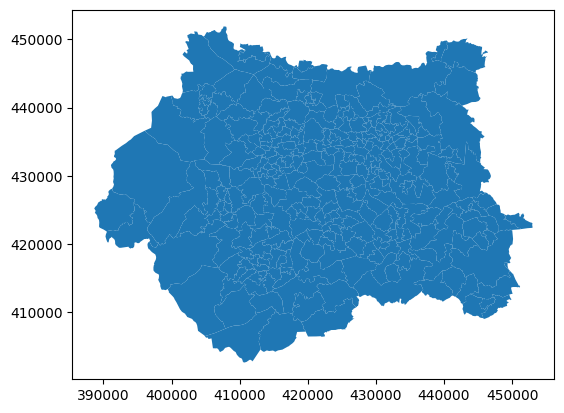

In [182]:
#Read in the MSOA boundaries downloaded from the ONS website
MSOA_boundaries=gpd.read_file("../data_local/external/boundaries/MSOA_EngWal_Dec_2011_Generalised_ClippedEW_0/Middle_Layer_Super_Output_Areas_December_2011_Generalised_Clipped_Boundaries_in_England_and_Wales.shp")
West_yorkshire_MSOA=MSOA_boundaries[MSOA_boundaries["msoa11cd"].isin(cencus_od_MSOA.Home_MSOA.unique())]
West_yorkshire_MSOA.plot()

In [144]:
#calculate_distance_matrix
West_yorkshire_MSOA.set_index('msoa11cd', inplace=True)
distances = West_yorkshire_MSOA.rename_axis('Orig').centroid.apply(lambda x: West_yorkshire_MSOA.rename_axis('Dest').centroid.distance(x)).stack().reset_index()
distances.rename(columns = {0:'Dist'}, inplace=True)
distances

,Orig,Dest,Dist
0,E02002183,E02002183,0.000000
1,E02002183,E02002184,2735.304013
2,E02002183,E02002185,7235.696937
3,E02002183,E02002186,4876.409902
4,E02002183,E02002187,6938.273942
...,...,...,...
89396,E02006876,E02002482,23757.088813
89397,E02006876,E02006852,7882.153901
89398,E02006876,E02006861,5685.897394
89399,E02006876,E02006875,2992.701978


In [95]:
cencus_od_MSOA_long = pd.melt(cencus_od_MSOA, id_vars="Home_MSOA",var_name='Workplace_MSOA', value_name='flow_Census')
cencus_od_MSOA_long

,Home_MSOA,Workplace_MSOA,flow_Census
0,E02002183,E02002183,168
1,E02002184,E02002183,205
2,E02002185,E02002183,47
3,E02002186,E02002183,90
4,E02002187,E02002183,31
...,...,...,...
89396,E02002478,E02002482,25
89397,E02002479,E02002482,36
89398,E02002480,E02002482,49
89399,E02002481,E02002482,48


In [96]:
# SPC OD matrix is generated by counting the number of people in each MSOA that work in another MSOA from the SPC data
# (22nd July 2024)The current SPC data is from no-SIC code matching version
SPC_OD_matrix=spc_people_hh.groupby("msoa11cd").apply(lambda x: x.value_counts("Work_MSOA11CD")).reset_index()
SPC_OD_matrix.rename(columns={"msoa11cd":"Home_MSOA","Work_MSOA11CD":"Workplace_MSOA","count":"flow_SPC"},inplace=True)
SPC_OD_matrix

/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_77029/3994634249.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  SPC_OD_matrix=spc_people_hh.groupby("msoa11cd").apply(lambda x: x.value_counts("Work_MSOA11CD")).reset_index()


,Home_MSOA,Workplace_MSOA,flow_SPC
0,E02002183,E02002183,946
1,E02002183,E02002184,605
2,E02002183,E02006875,78
3,E02002183,E02002190,75
4,E02002183,E02002251,50
...,...,...,...
47007,E02006876,E02002401,1
47008,E02006876,E02002280,1
47009,E02006876,E02002262,1
47010,E02006876,E02002408,1


In [149]:
df_comparison=pd.merge(cencus_od_MSOA_long,SPC_OD_matrix,how="left",left_on=["Home_MSOA","Workplace_MSOA"],right_on=["Home_MSOA","Workplace_MSOA"]).fillna(0)
distances.rename(columns={"Orig":"Home_MSOA","Dest":"Workplace_MSOA"},inplace=True)
df_comparison=df_comparison.join(distances.set_index(["Home_MSOA","Workplace_MSOA"]),on=["Home_MSOA","Workplace_MSOA"],how="left")
df_comparison

,Home_MSOA,Workplace_MSOA,flow_Census,flow_SPC,Dist
0,E02002183,E02002183,168,946.0,0.000000
1,E02002184,E02002183,205,286.0,2735.304013
2,E02002185,E02002183,47,87.0,7235.696937
3,E02002186,E02002183,90,205.0,4876.409902
4,E02002187,E02002183,31,41.0,6938.273942
...,...,...,...,...,...
89396,E02002478,E02002482,25,26.0,4496.295948
89397,E02002479,E02002482,36,51.0,2758.318456
89398,E02002480,E02002482,49,41.0,2022.381831
89399,E02002481,E02002482,48,61.0,3313.764601


In [156]:
#average distance calcuation
SPC_distance= sum(df_comparison["flow_SPC"]*df_comparison["Dist"]) / sum(df_comparison["flow_SPC"])
Census_distance= sum(df_comparison["flow_Census"]*df_comparison["Dist"]) / sum(df_comparison["flow_Census"])
print("SPC average travel distance",SPC_distance,"\n Census average travel distance",Census_distance)

SPC average travel distance 6108.589014356584 
 Census average travel distance 7026.097234036974


In [183]:
sum(df_comparison["flow_Census"])
sum(df_comparison["flow_SPC"])
print("Census counts:",sum(df_comparison["flow_Census"]),"\nCurrent SPC counts:",int(sum(df_comparison["flow_SPC"])))

r2=np.corrcoef(df_comparison["flow_Census"],df_comparison["flow_SPC"])[0,1]**2
print("The R^2 value is: ",r2)

rmse=np.sqrt(np.mean((df_comparison["flow_Census"]-df_comparison["flow_SPC"])**2))
print("The RMSE value is: ",rmse)

mes=np.mean(np.abs(df_comparison["flow_Census"]-df_comparison["flow_SPC"]))
print("The MAE value is: ",mes)

Census counts: 783428 
Current SPC counts: 677216
The R^2 value is:  0.660057237701492
The RMSE value is:  34.360392786344164
The MAE value is:  6.421024373329157


/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_77029/3523652021.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  SPC_distance_MSOA=df_comparison.groupby("Home_MSOA").apply(lambda x: sum(x["flow_SPC"]*x["Dist"]) / sum(x["flow_SPC"])).reset_index()
/var/folders/jl/8nv_1f6915lct8qfk5b81hx80000gn/T/ipykernel_77029/3523652021.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Census_distance_MSOA

<Axes: >

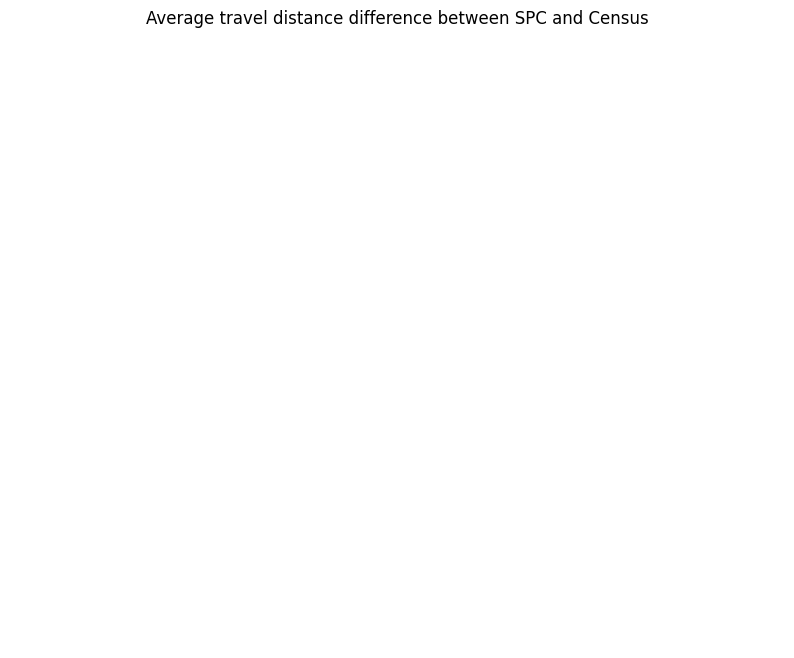

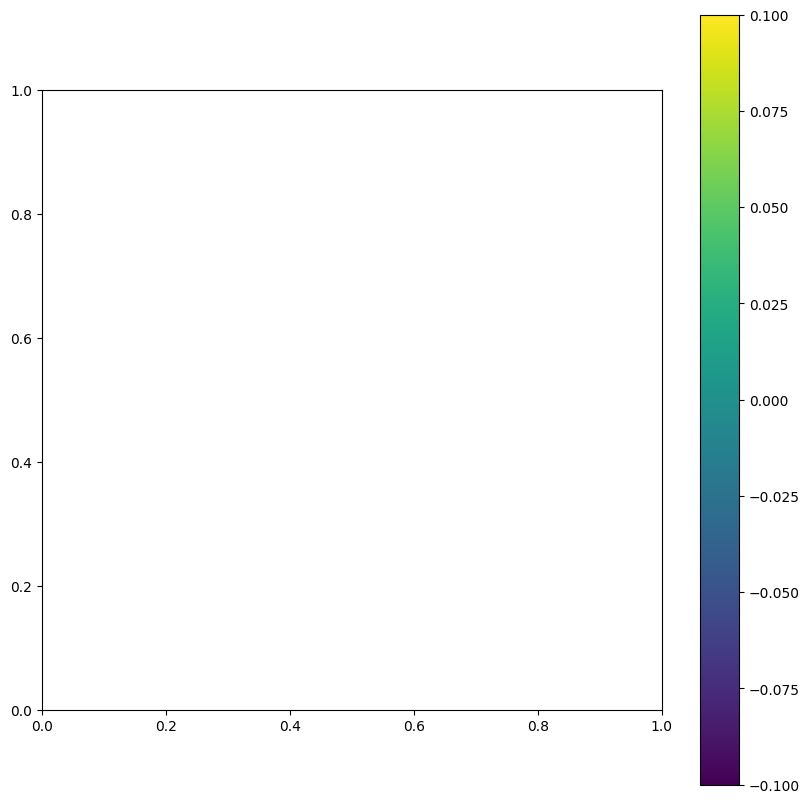

In [188]:
# map travel distance differences
SPC_distance_MSOA=df_comparison.groupby("Home_MSOA").apply(lambda x: sum(x["flow_SPC"]*x["Dist"]) / sum(x["flow_SPC"])).reset_index()
Census_distance_MSOA=df_comparison.groupby("Home_MSOA").apply(lambda x: sum(x["flow_Census"]*x["Dist"]) / sum(x["flow_Census"])).reset_index()
average_distance_MSOA=pd.merge(SPC_distance_MSOA,Census_distance_MSOA,how="left",on="Home_MSOA")
average_distance_MSOA.rename(columns={"0_x":"SPC_distance","0_y":"Census_distance"},inplace=True)
average_distance_MSOA

#plot the differences
average_distance_MSOA["Difference"]=(average_distance_MSOA["SPC_distance"]-average_distance_MSOA["Census_distance"])/1000
average_distance_MSOA.set_index("Home_MSOA",inplace=True)
average_distance_MSOA=West_yorkshire_MSOA.join(average_distance_MSOA)
fig, ax = plt.subplots(figsize=(10, 8))
plt.axis('off')
plt.title('Average travel distance difference between SPC and Census')
average_distance_MSOA.plot(column="Difference",legend=True,figsize=(10,10)) 

In [170]:
#	% map differences
sum_dj =df_comparison.groupby("Workplace_MSOA").agg({"flow_Census":"sum","flow_SPC":"sum"})
sum_dj["diff"]=sum_dj["flow_Census"]-sum_dj["flow_SPC"]
sum_dj["diff_percentage"]=sum_dj["diff"]/sum_dj["flow_Census"]
sum_dj["diff_abs"]=abs(sum_dj["diff"])/sum_dj["flow_Census"]

array([[<Axes: title={'center': 'diff'}>]], dtype=object)

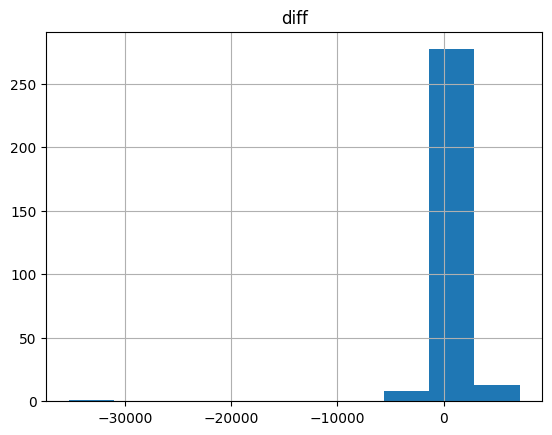

In [169]:
sum_dj.hist("diff")

array([[<Axes: title={'center': 'diff_abs'}>]], dtype=object)

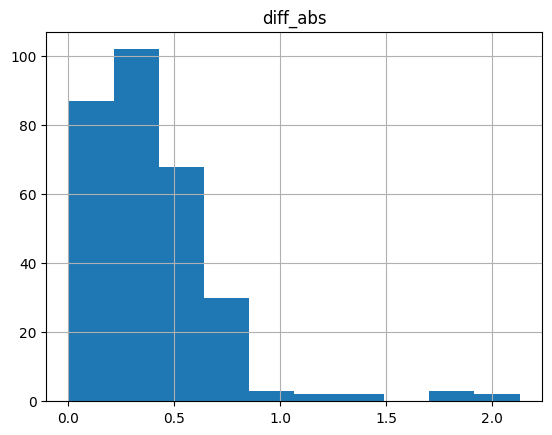

In [171]:
sum_dj.hist("diff_abs")

In [189]:
sum_dj =df_comparison.groupby("Workplace_MSOA").agg({"flow_Census":"sum","flow_SPC":"sum"})
sum_dj["diff"]=sum_dj["flow_Census"]-sum_dj["flow_SPC"]
sum_dj["diff_percentage"]=sum_dj["diff"]/sum_dj["flow_Census"]
sum_dj["diff_abs"]=abs(sum_dj["diff"])/sum_dj["flow_Census"]
sum_dj["diff_per"]=(sum_dj["diff"])/sum_dj["flow_Census"]

sum_dj

,flow_Census,flow_SPC,diff,diff_percentage,diff_abs,diff_per
Workplace_MSOA,,,,,,
E02002183,1027,2866.0,-1839.0,-1.790652,1.790652,-1.790652
E02002184,3611,6576.0,-2965.0,-0.821102,0.821102,-0.821102
E02002185,623,797.0,-174.0,-0.279294,0.279294,-0.279294
E02002186,4768,2778.0,1990.0,0.417366,0.417366,0.417366
E02002187,466,687.0,-221.0,-0.474249,0.474249,-0.474249
...,...,...,...,...,...,...
E02002482,465,697.0,-232.0,-0.498925,0.498925,-0.498925
E02006852,3161,2743.0,418.0,0.132237,0.132237,0.132237
E02006861,3128,2209.0,919.0,0.293798,0.293798,0.293798


<Axes: title={'center': 'Difference in flow count different by zones between SPC and Census'}>

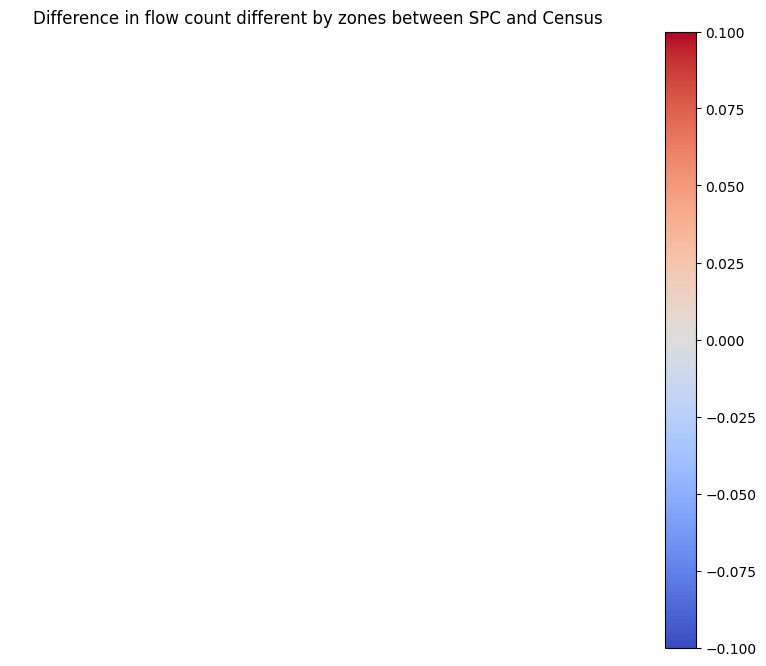

In [190]:
# plot diff_abs
fig, ax = plt.subplots(figsize=(10, 8))
plt.axis('off')
plt.title('Difference in flow count different by zones between SPC and Census')
West_yorkshire_MSOA.join(sum_dj).plot(column="diff_per",legend=True,ax=ax,cmap="coolwarm",vmax=1)

<Axes: title={'center': 'Absolute value difference in flow between SPC and Census'}>

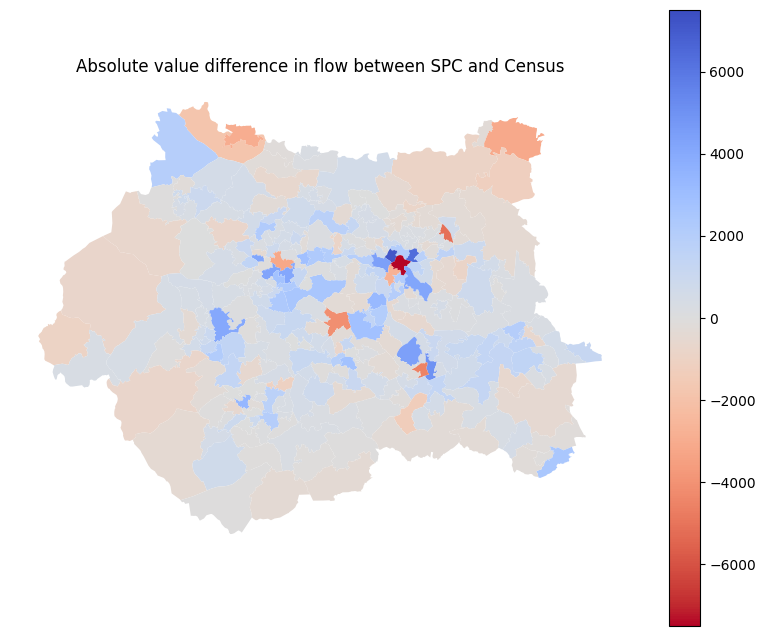

In [141]:
#plot the differences
fig, ax = plt.subplots(figsize=(10, 8))
plt.axis('off')
plt.title('Absolute value difference in flow between SPC and Census')
West_yorkshire_MSOA.join(sum_dj,on="msoa11cd").plot(column="diff",ax=ax,legend=True,cmap="coolwarm_r",vmin=-7500,vmax=7500)

<Axes: title={'center': 'Percentage Difference in flow between SPC and Census'}>

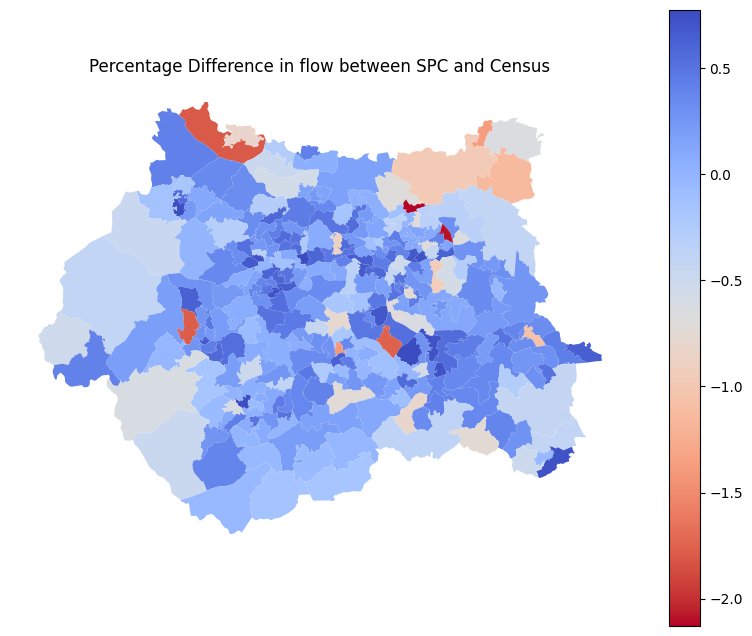

In [136]:
#plot the differences
fig, ax = plt.subplots(figsize=(10, 8))
plt.axis('off')
plt.title('Percentage Difference in flow between SPC and Census')
West_yorkshire_MSOA.join(sum_dj,on="msoa11cd").plot(column="diff_percentage",ax=ax,legend=True,cmap="coolwarm_r")